# DIABETES PREDICTION DATASET - CLASSIFICATION

### ABOUT DATA SET - INTRODUCTION


Link for the dataset:https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data

### 1-  Clearly define the data mining problem and objectives.

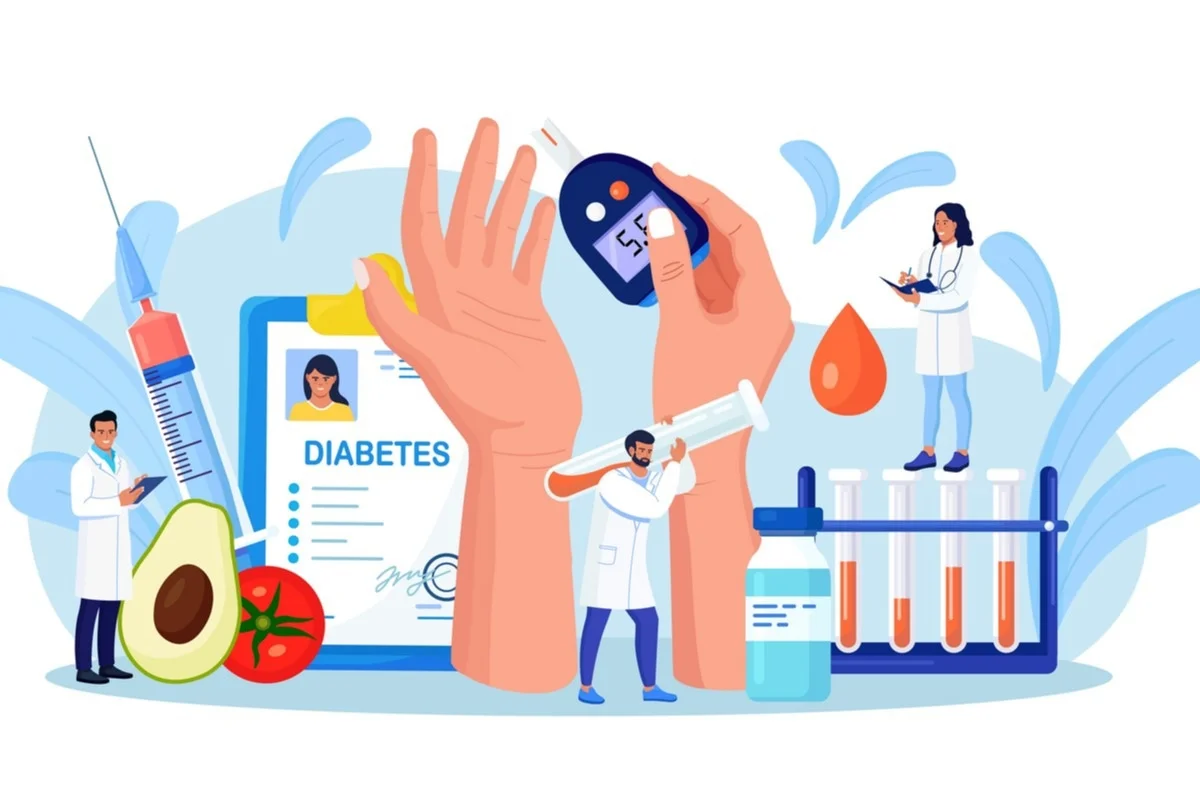

* Objective:

To thoroughly understand and preprocess the dataset to ensure it is clean, relevant, and well-structured for modeling.

To determine the most relevant features that contribute to the prediction of diabetes and create new features that may improve the model’s performance.

The objective of this project is to develop a robust model for predicting the likelihood of diabetes in patients based on their medical history and demographic information.

* Data Mining problem:

To develop a predictive model that can accurately identify individuals who are at risk of developing diabetes based on a range of demographic and medical attributes.

* About the dataset:

    * Age: Age is an important factor in predicting diabetes risk. As individuals get older, their risk of developing diabetes increases. This is partly due to factors such as reduced physical activity, changes in hormone levels, and a higher likelihood of developing other health conditions that can contribute to diabetes.

    * Gender: Gender can play a role in diabetes risk, although the effect may vary. For example, women with a history of gestational diabetes (diabetes during pregnancy) have a higher risk of developing type 2 diabetes later in life. Additionally, some studies have suggested that men may have a slightly higher risk of diabetes compared to women.

    * Body Mass Index (BMI): BMI is a measure of body fat based on a person's height and weight. It is commonly used as an indicator of overall weight status and can be helpful in predicting diabetes risk. Higher BMI is associated with a greater likelihood of developing type 2 diabetes. Excess body fat, particularly around the waist, can lead to insulin resistance and impair the body's ability to regulate blood sugar levels.

    * Hypertension: Hypertension, or high blood pressure, is a condition that often coexists with diabetes. The two conditions share common risk factors and can contribute to each other's development. Having hypertension increases the risk of developing type 2 diabetes and vice versa. Both conditions can have detrimental effects on cardiovascular health.

    * Heart Disease: Heart disease, including conditions such as coronary artery disease and heart failure, is associated with an increased risk of diabetes. The relationship between heart disease and diabetes is bidirectional, meaning that having one condition increases the risk of developing the other. This is because they share many common risk factors, such as obesity, high blood pressure, and high cholesterol.

    * Smoking History: Smoking is a modifiable risk factor for diabetes. Cigarette smoking has been found to increase the risk of developing type 2 diabetes. Smoking can contribute to insulin resistance and impair glucose metabolism. Quitting smoking can significantly reduce the risk of developing diabetes and its complications.

    * HbA1c Level: HbA1c (glycated hemoglobin) is a measure of the average blood glucose level over the past 2-3 months. It provides information about long-term blood sugar control. Higher HbA1c levels indicate poorer glycemic control and are associated with an increased risk of developing diabetes and its complications.

    * Blood Glucose Level: Blood glucose level refers to the amount of glucose (sugar) present in the blood at a given time. Elevated blood glucose levels, particularly in the fasting state or after consuming carbohydrates, can indicate impaired glucose regulation and increase the risk of developing diabetes. Regular monitoring of blood glucose levels is important in the diagnosis and management of diabetes.
    
    * Diabetes: Presnce or absent of diabetes.

variable details view taken from : https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp

### 2-  Formulates the problem in a way suitable for data mining techniques.
This dataset is a medical data set. Hence the steps can be a combination of data mining techniques.

Steps:
PREPROCESS THE DATASET AS SPECIFIED IN THE DATA MINING PROCESS
* Loading the dataset
* Identify Numerical and Categorical variable
* Duplicate checking
* Missing values checking
* Outlier detection and apply treatments using EDA

EDA
* Univariate analysis
* Multivariate analysis

FEATURE SCALING AND ENCODING
MODEL FITTING
* Model fitting with under sampling
    *  Logistic regression
    *  Decision Tress
    *  Random Forest
    *  SVM
    *  XGBoost Classifies
    *  Model comprison
 
    
* Model fitting without sampling
    *  Logistic regression
    *  Decision Tress
    *  Random Forest
    *  SVM
    *  XGBoost Classifies

* Mode comparison

ACTIONABLE INSIGHT


### PREPROCESS THE DATASET AS SPECIFIED IN THE DATA MINING PROCESS.

In [1]:
#imprort libraries
import pandas as pd # to use pandas dataframe
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### LOADING DATASET

In [2]:
# Set the file path
file_path = 'data/diabetes_prediction_dataset.csv'

# Read the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [3]:
# Dimension of tha data set (to get idea about number of variables in the dataset and number of data records in the dataset)
data.shape

(100000, 9)

*shape* function helps to identify number of columns and number of rows in the dataset.
This data set consist of 9 variables and 100000 data records - this is comperatively a large data set

In [4]:
#Checking the dtypes of all the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


All variable types shows as object,float or int. But there are some categorical variables which is indicate as numerical variables. Hence it is required to classify categorical and numerical variables.


#### Identify Numerical and Categorical variables

In [5]:
numeric_col=[]
non_numeric_col=[]
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        if(data[column].nunique()<3):
            non_numeric_col.append(column)
        else:
            numeric_col.append(column)
    else:
        non_numeric_col.append(column)

In [6]:
print(numeric_col)
print(non_numeric_col)

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']


There are 4 numerical variables and 5 categorical variables. We need this because, when we try to outliers, EDA and model fitting, it is important to identify them.

If the column data type is numeric and number if unique values in the column grater than 3 its marked as numerical variable. Others marked as categrical variables. 

In [7]:
#change the vriable type of identified categorical varables as category
for column in non_numeric_col:
    data[column] = data[column].astype('category')

print(data.dtypes)


gender                 category
age                     float64
hypertension           category
heart_disease          category
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes               category
dtype: object


It is important to mark categrical variables to further analysis. If not categorical variables can act as numerical variables

In [8]:
# look  describe data set
data.describe().round(2)

age        bmi  HbA1c_level  blood_glucose_level
count  100000.00  100000.00    100000.00            100000.00
mean       41.89      27.32         5.53               138.06
std        22.52       6.64         1.07                40.71
min         0.08      10.01         3.50                80.00
25%        24.00      23.63         4.80               100.00
50%        43.00      27.32         5.80               140.00
75%        60.00      29.58         6.20               159.00
max        80.00      95.69         9.00               300.00

### DATA PREPARATION

### CHECKING FOR DUPLICATE RECORDS

In [9]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


There are 3854 duplicate records in the dataset. Hence we have to remove them from the data set.

Removing duplicates from a dataset is generally considered to be a good practice as it helps in improving the accuracy and reliability of the data. Duplicates can cause biases in the data analysis and lead to incorrect conclusions.

In [10]:
#remove duplicate records
data = data.drop_duplicates()

In [11]:
#check the shape of the data set after removing duplicate records
data.shape

(96146, 9)

### CHECKING FOR MISSING VALUES

In [12]:
# Checking null values
print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


isnull() function helps to identify null values in the dataset. There are no NULL values in the data set. Hence this data set does not have any missing values. Also previous info() function also helps to identify null values. Both functions confirmed that the data set does not have any null values.

In [13]:
#Create a copy of data frame
data_new=data

### OUTLIER DETECTION 

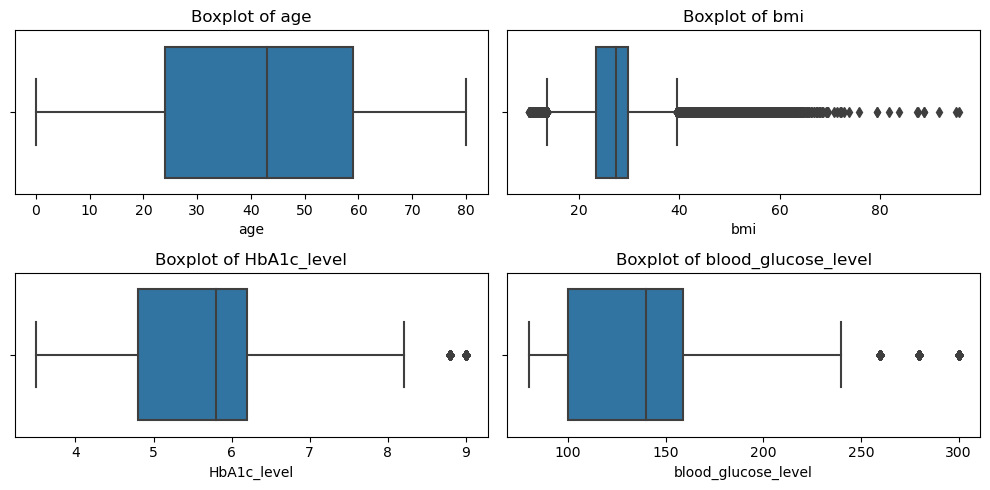

In [14]:
#Outlier detection in Numerical Variables

# Creating box plots for each numerical variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
# Flattening the axes array for easy iteration
axes_flat = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.boxplot(x=data_new[col], ax=axes_flat[i])
    axes_flat[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

The above box plots visualize the distribution of each numerical variable in the dataset. Outliers are typically represented by points that fall outside of the whiskers of the box plots.Boxplots helps to identify outliers of numerical variables in a viasual manner. By using these boxplots, we can identify wether a provided numerical variable have outliers or not.


In [15]:
# Identifying outliers based on the IQR method for each numerical variable
outliers = {}

for col in numeric_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine the indices of outliers
    outlier_indices = data_new[(data_new[col] < lower_bound) | (data[col] > upper_bound)].index
    outliers[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': len(outlier_indices)
    }


outliers_df = pd.DataFrame.from_dict(outliers, orient='index')

outliers_df.reset_index(inplace=True)
outliers_df.rename(columns={'index': 'Variable'}, inplace=True)

print(outliers_df)



              Variable  lower_bound  upper_bound  outliers_count
0                  age       -28.50       111.50               0
1                  bmi        13.71        39.55            5354
2          HbA1c_level         2.70         8.30            1312
3  blood_glucose_level        11.50       247.50            2031


This code block helps to calcuate number of outlieras in each continous variables.Previous boxplots gave a good visualization and presents about outliers. But thoes boxplots shows higher number of outliers. Hence this code block hept to get a numerical idea about thoes outliers.

Age: No outliers were found within the given bounds, which is expected as age data typically falls within a reasonable range without extreme outliers.

BMI (Body Mass Index):5354 outliers.These outliers may represent extremely low or high BMI values.

HbA1c Level:1312 outliers.All of them are grater than upper bound of boxplot.

Blood Glucose Level:2031 outliers.These are extremely high blood glucose readings.

#### In medical use cases we cannot remove outliesr without considering meaning of each variables. Beacuse outliers may provide more value to the dataset.Hence need to analyse each variable

#### Treating for outliers in HbA1c_level variable

C:\Users\wpdev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


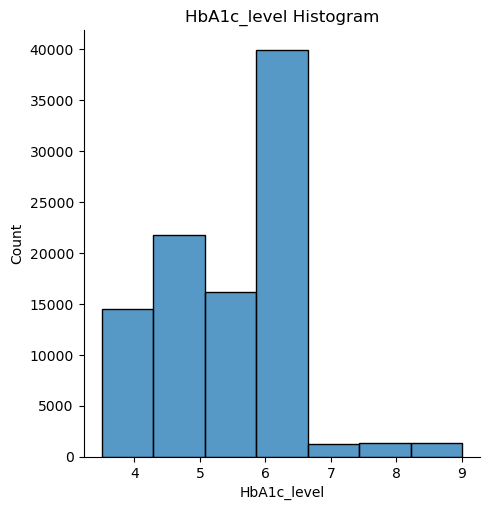

In [16]:
ax = sns.displot(data=data_new, x='HbA1c_level',bins=7)
ax.set(title='HbA1c_level Histogram')

This graph helps to get an idea about the values of the variable. 

When it come to HbA1c_level , we cannot remove outliers blindly because this outliers can provide more value to the analysis in real world.

HbA1c Normal Range By Age:
The American Diabetes Association (ADA) provides general guidelines for HbA1c levels that are considered normal for different age groups:

Children (Ages 6-12): The recommended normal HbA1c for children is below 7.5%.

Teens (Ages 13-18): Adolescents are advised to maintain HbA1c levels below 7.0%.

Adults (Ages 19-44): For adults in this age range, normal HbA1c is considered up to 6.5%.

Adults (Ages 45-64): The HbA1c blood test normal range for this age group is around 7.0%.

Seniors (Ages 65 and older): The ADA recommends a slightly higher HbA1c target of around 7.5% for older adults.

Ref:https://www.breathewellbeing.in/blog/hba1c-a1c-chart-test-levels-normal-range/

The same article mentioned that peopel can have higher HbA1c_level like 9.8 as well. Hence we cannot remove thoes higher values from the dataset

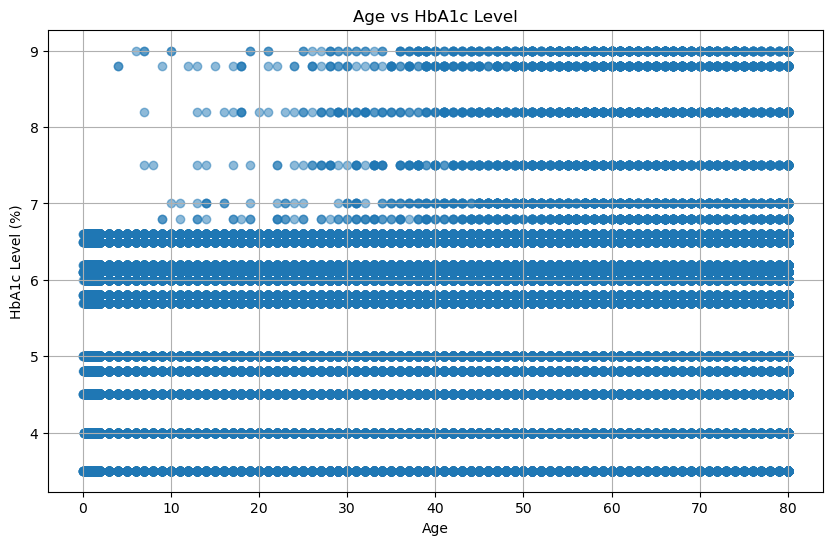

In [17]:
import matplotlib.pyplot as plt

# Plot Age vs HbA1c Level
plt.figure(figsize=(10, 6))
plt.scatter(data_new['age'], data_new['HbA1c_level'], alpha=0.5)
plt.title('Age vs HbA1c Level')
plt.xlabel('Age')
plt.ylabel('HbA1c Level (%)')
plt.grid(True)
plt.show()


This shows the relationship between AGE and HbA1c_level variables.Peopel who age < 20 have also have high HbA1c_level. But below graph shows a good relauonship between HbA1c_level and diabetes. which indecates that peopel who have higher HbA1c_level also have diabetes. Hence we cannot remove data rows from the datase which have higher HbA1c_level and age < 20 because thoes are marked as diabetes patients

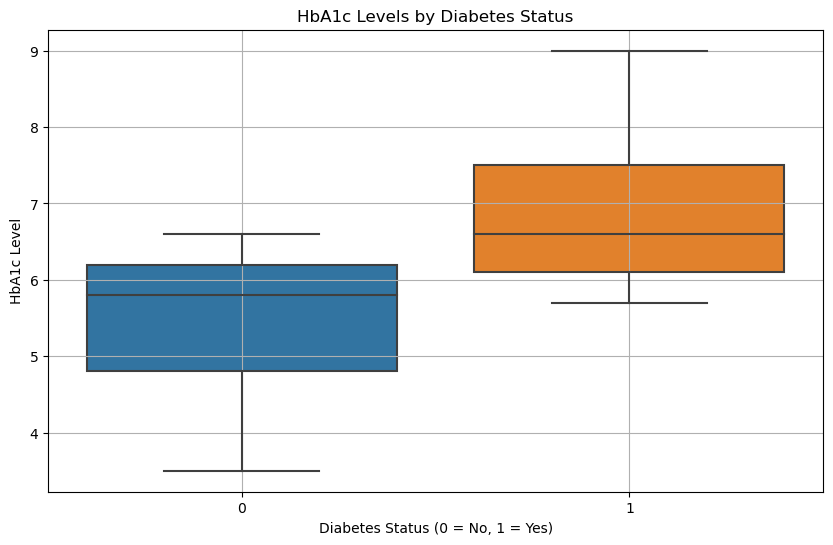

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=data_new)
plt.title('HbA1c Levels by Diabetes Status')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('HbA1c Level')
plt.grid(True)
plt.show()

This boxplot clearly shows that the outliers in HbA1c_level cannot remove from the data set because the target variable clearly shows a good relationship with HbA1c_level variable. 

Not only from that, by considering the meaning of the HbA1c_level variable it confirmed that. 

Hence we cannot remove outliers in the HbA1c_level variable for the dataset 

C:\Users\wpdev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


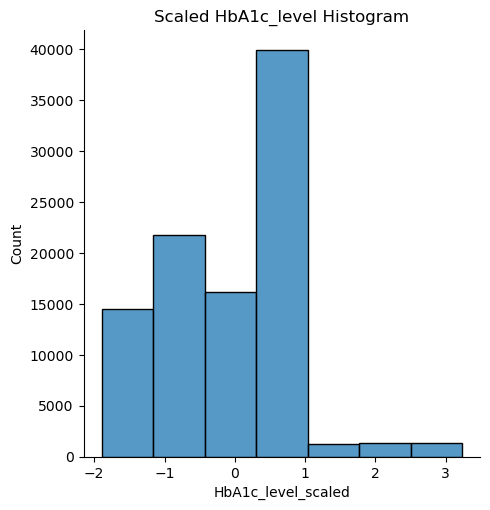

In [19]:
#apply StandardScaler tranformation to the variable
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the 'HbA1c_level' column
data_new['HbA1c_level_scaled'] = scaler.fit_transform(data_new[['HbA1c_level']])

# Plotting the scaled data
ax = sns.displot(data=data_new, x='HbA1c_level_scaled', bins=7)
ax.set(title='Scaled HbA1c_level Histogram')
plt.show()

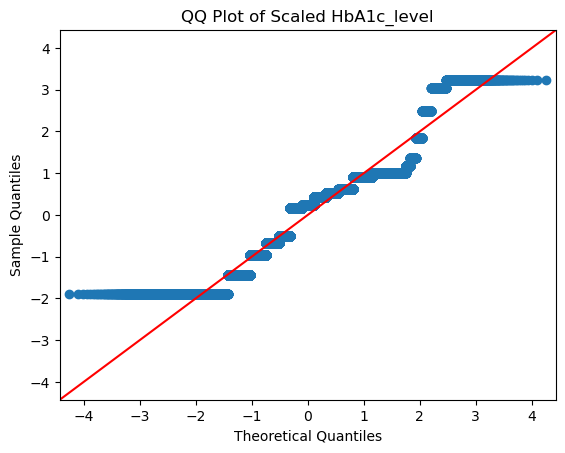

In [20]:
import statsmodels.api as sm
# Generating the QQ plot
fig = sm.qqplot(data_new['HbA1c_level_scaled'], line='45')
plt.title('QQ Plot of Scaled HbA1c_level')
plt.show()

from the histogram and the QQ plot, it appears that the points roughly follow the line but with some deviation, especially in the tails. This suggests that the distribution of scaled HbA1c_level variable is close to normal, but with some outliers or a slight deviation from normality, particularly at the extremes. This is common in real-world data.

#### Treating for outliers in blood_glucose_level

C:\Users\wpdev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


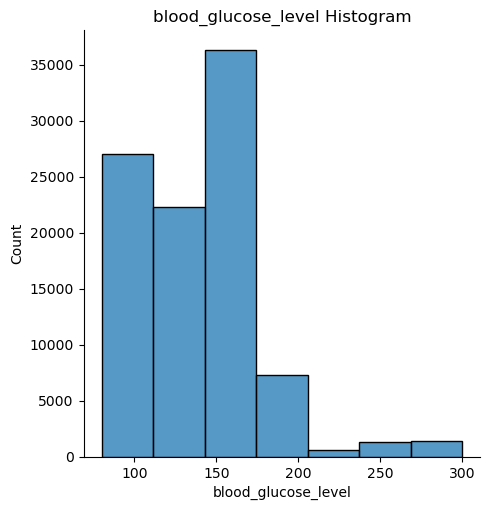

In [21]:
ax = sns.displot(data=data_new, x='blood_glucose_level',bins=7)
ax.set(title='blood_glucose_level Histogram')

This data set collected from random checks for patients who have visited the Emergency Room (ER) or Hospital or Clinic.The dataset does not specify whether the glucose levels represent the last blood glucose check of a 2-hour glucose tolerance test or the first check after an eight-hour fasting. Instead, the measurements seem to be taken without specific fasting requirements or as part of a standardized test.

Hence,
Possible critical values

Adult male - < 50 and >400 mg/dL

Adult female - < 40 and >400 mg/dL

Infant - < 40 mg/dL

Newborn - < 30 and >300 mg/dL

Ref: https://emedicine.medscape.com/article/2087913-overview?form=fpf

https://www.mayoclinic.org/diseases-conditions/type-2-diabetes-in-children/diagnosis-treatment/drc-20355324

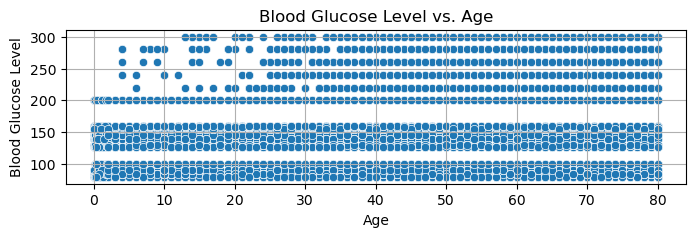

In [22]:
plt.figure(figsize=(8, 2))
sns.scatterplot(x='age', y='blood_glucose_level', data=data_new)
plt.title('Blood Glucose Level vs. Age')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.grid(True)
plt.show()

In real life in real use cases we know that the blood glucose level  can increase with the age. But in special cases this assumption can be change.

The above graph shows that, most of kids whos age <20 don't have higher blood glucose level. But  there are few kids who have higher value. hence we have to clarify wheather thoes kids have diaberes or not. Because if they sufering from dibetes then we have to consider those data records to our analysis. If not we can consider them as real outliers and remove them. 

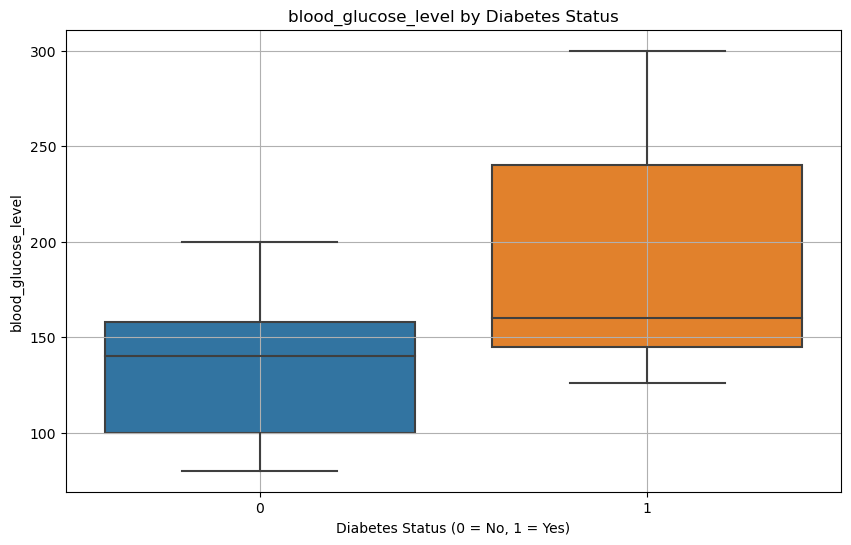

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data_new)
plt.title('blood_glucose_level by Diabetes Status')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('blood_glucose_level')
plt.grid(True)
plt.show()

In [24]:
kids_under_10_with_diabetes = data_new[
    (data_new['age'] < 18) & 
    (data_new['diabetes'] == 1)
]

# Count the number of such cases
count_kids_under_10_with_diabetes = kids_under_10_with_diabetes.shape[0]

print("Number of children under 18 with diabetes:", count_kids_under_10_with_diabetes)

Number of children under 18 with diabetes: 82


Above graph and facts shows that the outliers in blood_glucose_level is possible and we cannot remove them from the dataset.

But when analysing blood_glucose_level and HbA1c_level variables, both variabs showing same kind ditribution. 

#### Treating for outliers in BMI

C:\Users\wpdev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


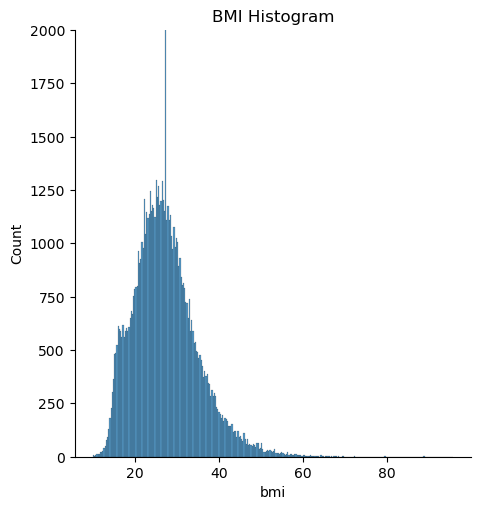

In [25]:
ax = sns.displot(data=data_new, x='bmi')
plt.ylim((0, 2000))
ax.set(title='BMI Histogram')

In [26]:
#identify the outlier percentage in BMI
print((len(data_new.query('bmi > 39.55 or bmi < 13.71'))/len(data_new)*100),"%")

5.568614398934954 %


This graph provide a good visualization about BMI variation.  Data is right skewed. It is important to deeply analyse BMI<13.71 (which is lower bound of the Outlier) and BMI>39.55 (which is upper bound of the outliers) Because 5.6% of data are outliers in BMI value (5354 data points). Also There are more observation to a single BMI value. Hence it is important to idenify that vaue and deep dive into that value.

###### BMI <13.71

In [27]:
# Filtering the dataset for rows where BMI is greater than 39
data_bmi_less_than_13_71 = data_new[data_new['bmi'] < 13.71]

# Selecting only the age and BMI values
age_bmi_less_than_13_71 = data_bmi_less_than_13_71[['age', 'bmi','gender']]

# Displaying the first few rows to see the result
print(age_bmi_less_than_13_71.head())
print(len(age_bmi_less_than_13_71))


       age    bmi  gender
264   4.00  13.57  Female
268   0.16  12.15  Female
677   0.88  10.30  Female
824   0.16  11.16    Male
1089  1.64  13.12    Male
414


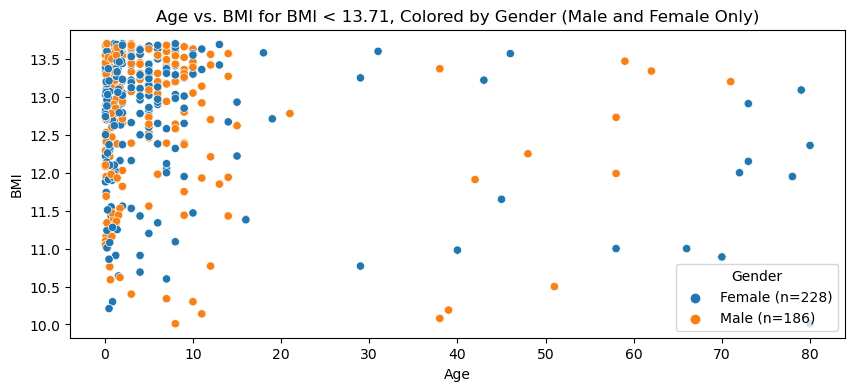

In [28]:
# Filter the dataset to exclude 'Other'
filtered_data = age_bmi_less_than_13_71[age_bmi_less_than_13_71['gender'].isin(['Male', 'Female'])]
gender_counts = filtered_data['gender'].value_counts()

# Now plot the scatter plot with the filtered data
plt.figure(figsize=(10, 4))
sns.scatterplot(x='age', y='bmi', hue='gender', data=filtered_data)

# Set the title and labels
plt.title('Age vs. BMI for BMI < 13.71, Colored by Gender (Male and Female Only)')
plt.xlabel('Age')
plt.ylabel('BMI')

# Extract the handles and labels from the current legend
handles, labels = plt.gca().get_legend_handles_labels()

# Filter out the 'Other' category by keeping only the handles and labels for 'Male' and 'Female'
filtered_handles = [h for h, l in zip(handles, labels) if l in ['Male', 'Female']]
filtered_labels = [f'{l} (n={gender_counts[l]})' for l in labels if l in ['Male', 'Female']]

# Create a new legend
plt.legend(filtered_handles, filtered_labels, title='Gender')

# Show the plot
plt.show()


This figue provides a better visualization between age and BMI values and also it gives a idea about gender variation for the considered variables. 

When it comes to the gender there is no clear clusters. Both males and females have kind of same distribution in this plot.

##### For Adult:(age >= 18)

"In males, a BMI of around 13 appears to be fatal. The coefficient of variation (CV) of the BMI is 8.7%. "
"Mean BMI of 12 as the lower limit for human survival emerges - a value first proposed by James et al (1988)"

ref:https://www.ennonline.net/fex/15/limits#:~:text=In%20males%2C%20a%20BMI%20of,low%20as%209%20and%2010.

By considering these factors it is possible to remove data points which age > 18 and BMI < 13.71


#### For Kids:(age < 18)

The BIM is in 10 to 13.71 is underweight category but possible. Hece do not remove them from the data set

ref:https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/about_childrens_bmi.html

##### Remove identified outliers [ age >= 18 and BMI <= 13.71 ]

In [29]:
# Filtering the dataset for individuals with age >= 18 and BMI <= 13.71
filtered_data = data_new[(data_new['age'] >= 18) & (data_new['bmi'] <= 13.71)]

# Counting the number of data points that meet the criteria
count_of_data_points = filtered_data.shape[0]

print("Count of data points where age >= 18 and BMI <= 13.71:", count_of_data_points)


Count of data points where age >= 18 and BMI <= 13.71: 33


In [30]:
# Removing records from the main dataset where age >= 18 and BMI <= 13.71
data = data.drop(data[(data['age'] >= 18) & (data['bmi'] <= 13.71)].index)

print("Number of rows after removal:", data.shape[0])


Number of rows after removal: 96113


##### BMI >39.55

In [31]:
# Filtering the dataset for rows where BMI is greater than 39.55
data_bmi_grater_than_39_55 = data_new[data_new['bmi'] > 39.55]

# Selecting only the age and BMI values
age_bmi_than_39_55 = data_bmi_grater_than_39_55[['age', 'bmi','gender']]

# Displaying the first few rows to see the result
print(age_bmi_than_39_55.head())
print(len(age_bmi_than_39_55))


     age    bmi  gender
11  54.0  54.70  Female
39  34.0  56.43  Female
59  67.0  63.48  Female
93  38.0  55.61    Male
98  30.0  50.13  Female
4940


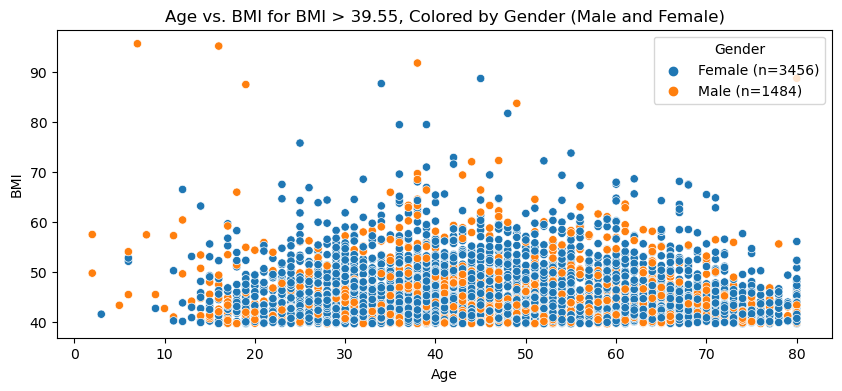

In [32]:
# Filter the dataset to exclude 'Other'
filtered_data1 = age_bmi_than_39_55[age_bmi_than_39_55['gender'].isin(['Male', 'Female'])]
gender_counts = filtered_data1['gender'].value_counts()

# Now plot the scatter plot with the filtered data
plt.figure(figsize=(10, 4))
sns.scatterplot(x='age', y='bmi', hue='gender', data=filtered_data1)

# Set the title and labels
plt.title('Age vs. BMI for BMI > 39.55, Colored by Gender (Male and Female)')
plt.xlabel('Age')
plt.ylabel('BMI')

# Extract the handles and labels from the current legend
handles1, labels1 = plt.gca().get_legend_handles_labels()

# Filter out the 'Other' category by keeping only the handles and labels for 'Male' and 'Female'
filtered_handles1 = [h for h, l in zip(handles1, labels1) if l in ['Male', 'Female']]
filtered_labels1 = [f'{l} (n={gender_counts[l]})' for l in labels1 if l in ['Male', 'Female']]

# Create a new legend
plt.legend(filtered_handles1, filtered_labels1, title='Gender')

# Show the plot
plt.show()


In [33]:
# Checking the count of records where age is less than 18, BMI is greater than 39.55, and diabetes is present
age_under_18_bmi_over_39_55_diabetes_count = data_new[
    (data_new['age'] <= 18) &
    (data_new['bmi'] > 39.55) &
    (data_new['diabetes'] == 1)  #  'diabetes' column has binary values where 1 indicates presence
].shape[0]

age_under_18_bmi_over_39_55_diabetes_count

1

Previous 3 code blocks to identify behaviour of BMI vs AGE with GENDER where BMI > 39.55 

The graph ilustrates that more female patients have BMI value > 39.55 than male patients.

##### For kids:(age <=18)

When it come to kids there are 98 kinds who have age < 18 and bmi > 39.55. But among them only 1 kind suffer from diabetes. 

But according to the BMI facts (Ref: https://www.cdc.gov/obesity/basics/childhood-defining.html) if a kid have BMI >= 39.55 they categorize as Class 2 Obesity or Class 3 Obesity.

The same article shows below example.

"For example, a 15-year-old girl who is 63.7 inches tall (50th percentile for height) and weighs 210 pounds would have a BMI of 36.4 kg/m2, placing her at the 99th percentile for her age and sex. Her BMI is 129% of the 95th percentile, which is class 2 obesity based on the expanded definition of severe obesity.

Having a high BMI-for-age percentile is associated with clinical risk factors for cardiovascular disease,including high cholesterol and high blood pressure, and other chronic conditions"

But in this data set only 1 kid have diabetes whos age <18 and BMI >39.55. Other 97 mentioned as non diabetes patients. 


###### Before remove the identified outliers, let's analyse weather that idenitied kids have high HbA1c_level and blood_glucose_level

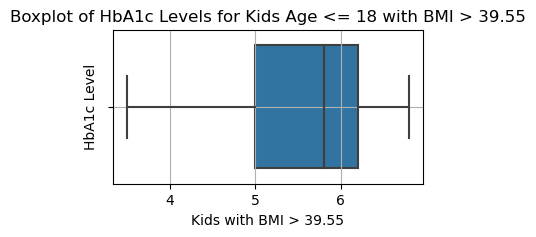

In [34]:
# Filtering the dataset for kids with age <= 18 and BMI > 39.55
kids_overweight = data_new[
    (data_new['age'] <= 18) &
    (data_new['bmi'] > 39.55)
]

# Plotting the boxplot for HbA1c levels among these kids
plt.figure(figsize=(4, 2))
sns.boxplot(data=kids_overweight, x='HbA1c_level')
plt.title('Boxplot of HbA1c Levels for Kids Age <= 18 with BMI > 39.55')
plt.ylabel('HbA1c Level')
plt.xlabel('Kids with BMI > 39.55')
plt.grid(True)
plt.show()

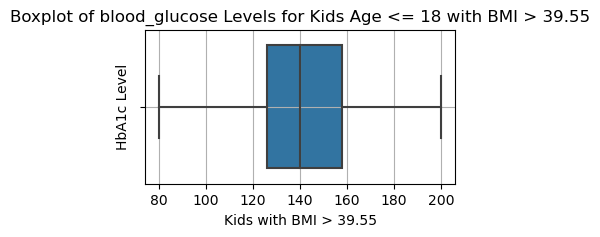

In [35]:
# Filtering the dataset for kids with age <= 18 and BMI > 39.55
kids_overweight = data_new[
    (data_new['age'] <= 18) &
    (data_new['bmi'] > 39.55)
]

# Plotting the boxplot for HbA1c levels among these kids
plt.figure(figsize=(4, 2))
sns.boxplot(data=kids_overweight, x='blood_glucose_level')
plt.title('Boxplot of blood_glucose Levels for Kids Age <= 18 with BMI > 39.55')
plt.ylabel('HbA1c Level')
plt.xlabel('Kids with BMI > 39.55')
plt.grid(True)
plt.show()

The above 2 boxplots show that, if the BMI of a kid (age <18) is > 39.55 (which is obesity) and did show any abnormality in diabeties factors like blood_glucose_level and HbA1c_level. Also majority of them are not identified as diabeties patients. 

But according to the medical use cases, if  BMI >= 39.55 they categorize as Class 2 Obesity or Class 3 Obesity and which causes to medical issues. 

Hence it is possible to remove them from the data set because the data values of that BMI values can be incorrect values.


In [36]:
indices_to_remove = data[
    (data['age'] <= 18) & 
    (data['bmi'] > 39.55)
].index

# Remove these records
data = data.drop(indices_to_remove)
print("Filtered dataset shape:", data.shape)

Filtered dataset shape: (95989, 10)


#### For Adults : (age >18):


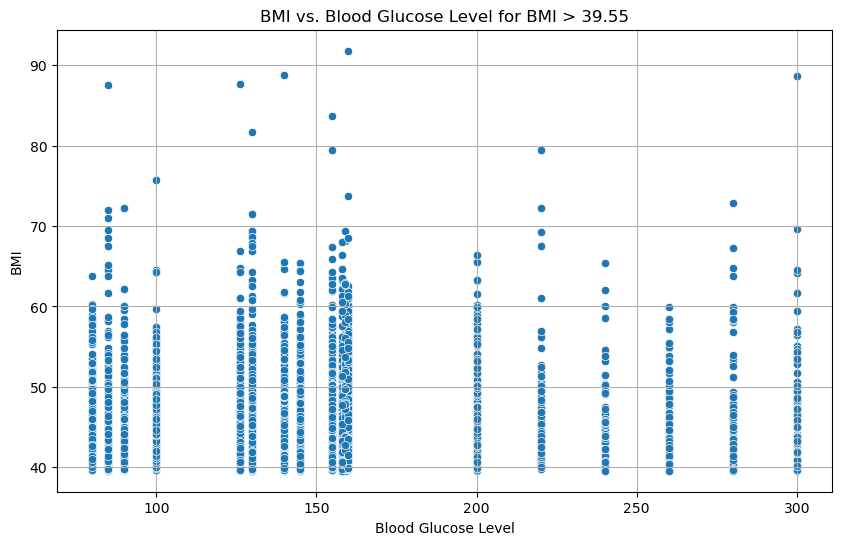

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
all_high_bmi = data_new[(data_new['bmi'] > 39.55) & (data_new['age']>18)]

plt.figure(figsize=(10, 6))
sns.scatterplot(y='bmi', x='blood_glucose_level', data=all_high_bmi)
plt.title('BMI vs. Blood Glucose Level for BMI > 39.55')
plt.ylabel('BMI')
plt.xlabel('Blood Glucose Level')
plt.grid(True)
plt.show()


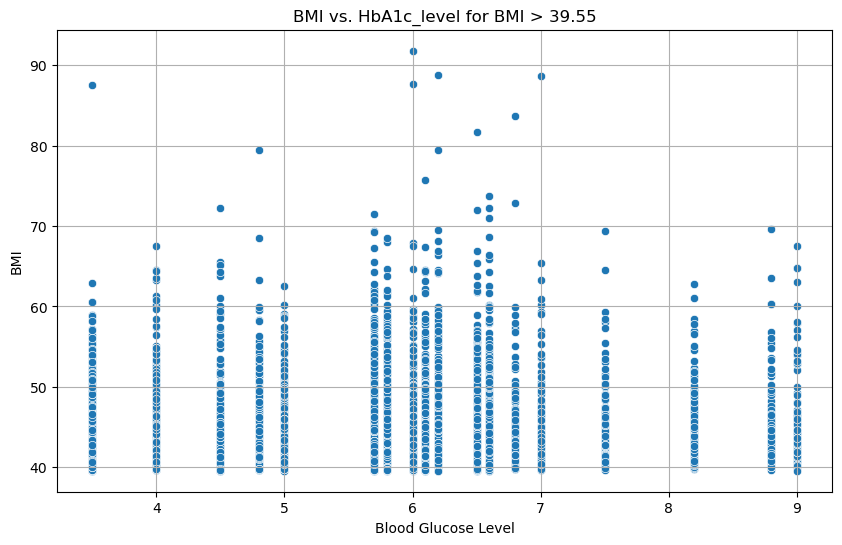

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
all_high_bmi = data_new[(data_new['bmi'] > 39.55) & (data_new['age']>18)]

plt.figure(figsize=(10, 6))
sns.scatterplot(y='bmi', x='HbA1c_level', data=all_high_bmi)
plt.title('BMI vs. HbA1c_level for BMI > 39.55')
plt.ylabel('BMI')
plt.xlabel('Blood Glucose Level')
plt.grid(True)
plt.show()


Above 2 graphs shows that, If BMI > = 60 but blood glucose level and HbA1c_level is not much higher in value. Hence let's focus on BMI >= 60 and age >18 patients

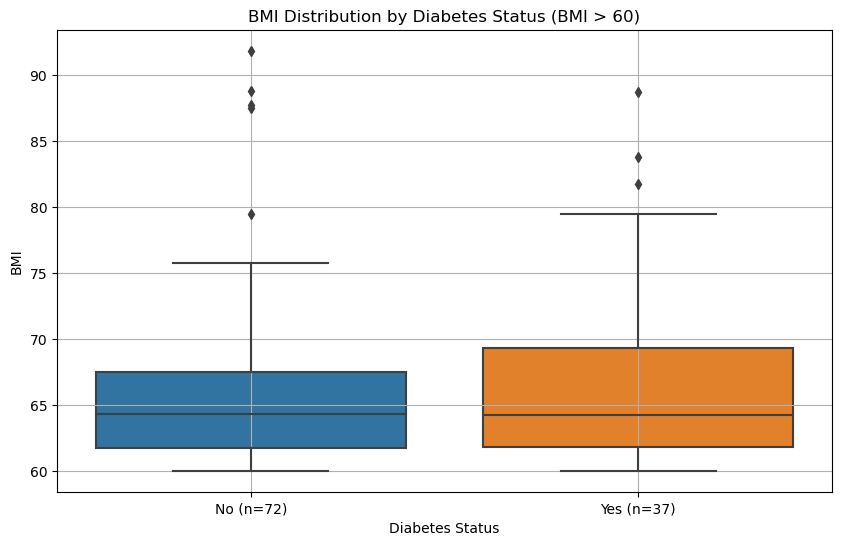

In [39]:
all_high_bmi = data_new[(data_new['bmi'] > 60) & (data_new['age']>18)]

# Create the boxplot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='diabetes', y='bmi', data=all_high_bmi)
plt.title('BMI Distribution by Diabetes Status (BMI > 60)')

# Count individuals by diabetes status
diabetes_counts = all_high_bmi['diabetes'].value_counts()

# Prepare custom labels with counts
labels = ['No (n={})'.format(diabetes_counts.get(0, 0)), 'Yes (n={})'.format(diabetes_counts.get(1, 0))]

# Apply custom labels to the x-axis
boxplot.set_xticklabels(labels)

plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

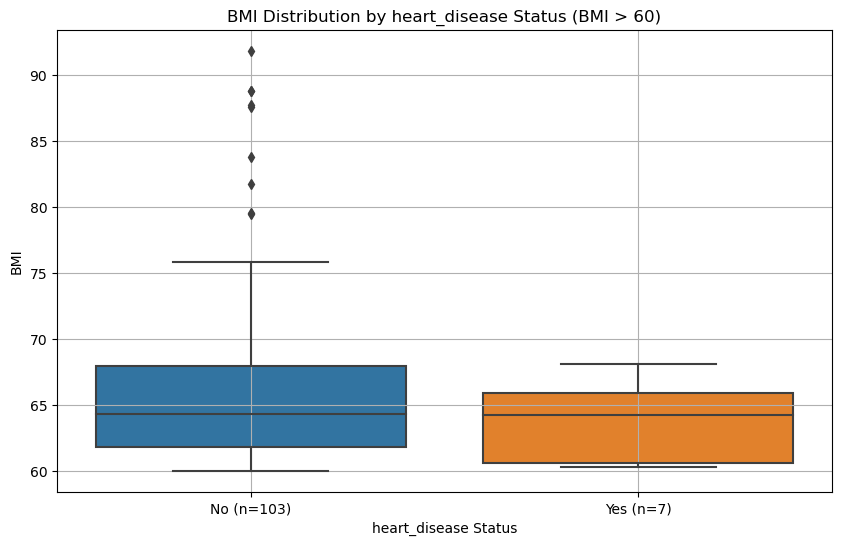

In [40]:
all_high_bmi = data_new[(data_new['bmi'] >= 60) & (data_new['age']>18)]

# Create the boxplot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='heart_disease', y='bmi', data=all_high_bmi)
plt.title('BMI Distribution by heart_disease Status (BMI > 60)')

# Count individuals by diabetes status
diabetes_counts = all_high_bmi['heart_disease'].value_counts()

# Prepare custom labels with counts
labels = ['No (n={})'.format(diabetes_counts.get(0, 0)), 'Yes (n={})'.format(diabetes_counts.get(1, 0))]

# Apply custom labels to the x-axis
boxplot.set_xticklabels(labels)

plt.xlabel('heart_disease Status')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

##### Assumption : when BMI > 60 and age >18 - patiensts are physically inactive
when BMI > 60 and age >18 we can remove thoes data recotds form the data set by consider as outliers because,

1 - when BMI > 60 it means severely obesity (REF: https://www.eatsmartmovemorenc.com/resource/bmi-chart/ , https://www.builtlean.com/bmi-chart/)
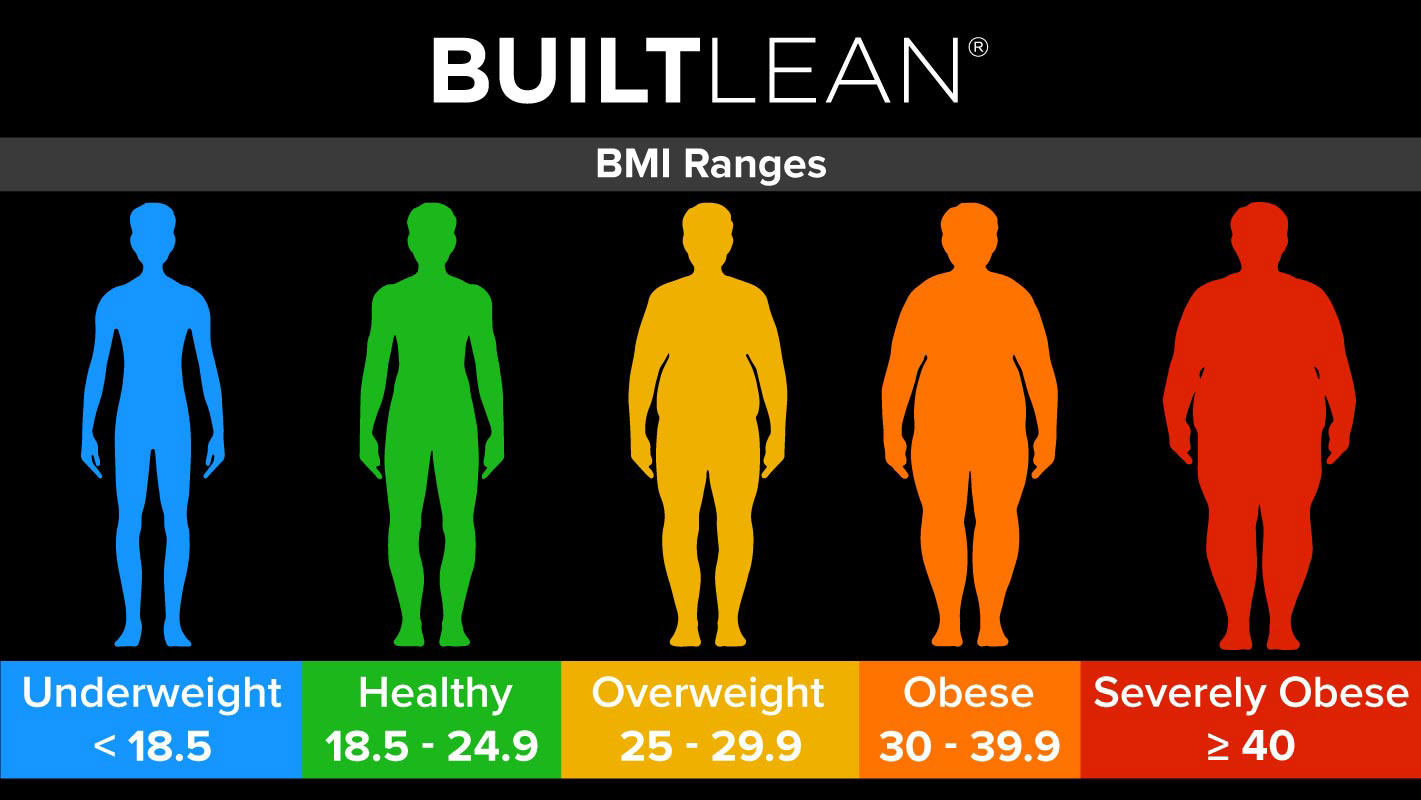

2 - when BMI increases more tha  60 glucose level and HbA1c_level should increase.(https://www.betterhealth.vic.gov.au/health/healthyliving/body-mass-index-bmi)

3 - when BMI increases more tha  60 patient suffer from high blood pressure ,hypertension and diabetes as well. (https://www.betterhealth.vic.gov.au/health/healthyliving/body-mass-index-bmi) 

But this datase not showing such pattern. When BMI > 60 and Age >18 majority of patiens are not showning heart disease , diabeties or hypertension and most parients in the mentioned category not showing high HbA1c_level or high Blood glucose levels.
But according to the medical studies , there can be few use cases shows healthy status but majority have to not show healthy status. 
(https://www.betterhealth.vic.gov.au/health/healthyliving/body-mass-index-bmi)

Hence When BMI >60 and age >18 thoes data records can consider as outliers and can remve from the dataset.

In [41]:
indices_to_remove = data[
    (data['age'] > 18) & 
    (data['bmi'] >= 60)
].index

# Remove these records
data = data.drop(indices_to_remove)

print("Filtered dataset shape:", data.shape)

Filtered dataset shape: (95879, 10)


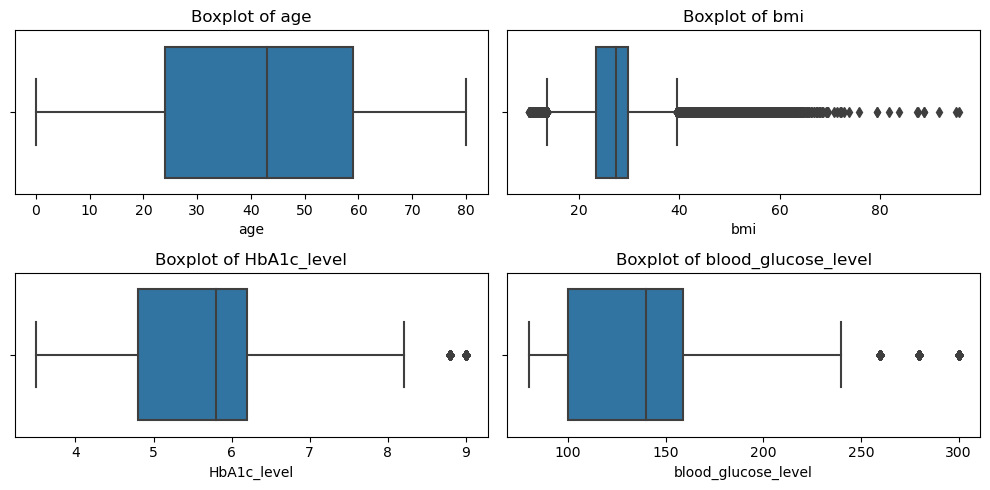

In [42]:
#Outlier detection in Numerical Variables


# Creating box plots for each numerical variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
# Flattening the axes array for easy iteration
axes_flat = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.boxplot(x=data_new[col], ax=axes_flat[i])
    axes_flat[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [43]:
#Check outliers after apply set of treatments to variables with outliers

# Identifying outliers based on the IQR method for each numerical variable
outliers = {}

for col in numeric_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine the indices of outliers
    outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
    outliers[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': len(outlier_indices)
    }


outliers_df = pd.DataFrame.from_dict(outliers, orient='index')

outliers_df.reset_index(inplace=True)
outliers_df.rename(columns={'index': 'Variable'}, inplace=True)

print(outliers_df)



              Variable  lower_bound  upper_bound  outliers_count
0                  age      -28.500      111.500               0
1                  bmi       13.785       39.425            5243
2          HbA1c_level        2.700        8.300            1301
3  blood_glucose_level       11.500      247.500            2019


### EXPLANATORY DATA ANALYSIS - EDA

The previous section provided treatments to outliers and in the same section we have noticed some of relationship between variables. But this section provide full detail view of explanatory data analysis.

when treating for the outliers also we have notices that all numerical variables are not normally distrbuted. In the next section Im going to apply transofrmations to that not normally distributed variables

#### UNIVARIATE ANALYSIS

Checking for normality is an important step in data analysis because many statistical tests and models assume that the data follows a normal distribution. Normality assumption can affet to ML model as well. Hence 

###### To assess the normality of the distribution statistically 

In [44]:
from scipy.stats import shapiro, normaltest, kstest
from scipy import stats


def check_normality(col):
    # Shapiro-Wilk Test
    # Note: For large datasets, the Shapiro-Wilk test can show significant results for even small deviations from normality.
    shapiro_test = shapiro(data[col])

    # Kolmogorov-Smirnov test, comparing the age distribution against a normal distribution with the same mean and std
    ks_test = kstest((data[col] - data[col].mean()) / data[col].std(), 'norm')

    # Since these tests may not be reliable for large samples, it's also good to look at the skewness and kurtosis
    skewness = stats.skew(data[col])
    kurtosis = stats.kurtosis(data[col])

    # Prepare results to output
    print('Shapiro-Wilk Test:', shapiro_test,'\n')
    print('Kolmogorov-Smirnov Test:',ks_test,'\n')
    print('Skewness:',skewness,'\n')

###### (Formal Statistical Test) Perform a Shapiro-Wilk Test.
If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

###### (Formal Statistical Test) Perform a Kolmogorov-Smirnov Test.
If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.
https://www.statology.org/normality-test-python/

###### Skewness
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241

The skewness and kurtosis parameters are both measures of the shape of the distribution. Skewness (coefficient of asymmetry) gives information about the tendency of the deviations from the mean to be larger in one direction than in the other. The skewness is mainly an intuitive description of a given distribution. The third moment characterizes the asymmetry of a distribution.




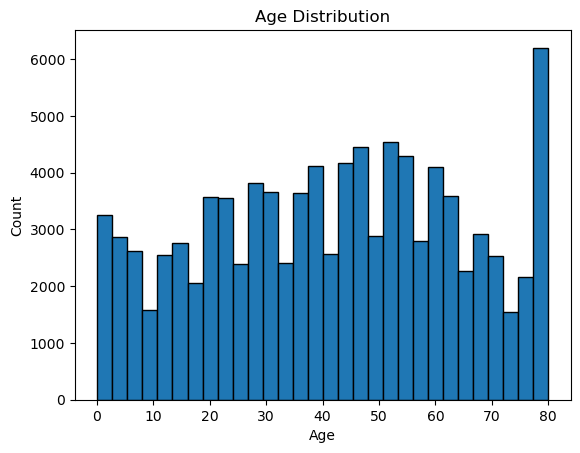

In [45]:
plt.hist(data['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [46]:
#check normality in age variable
print('check normality in age variable \n')
check_normality('age')

check normality in age variable 

Shapiro-Wilk Test: ShapiroResult(statistic=0.9679379463195801, pvalue=0.0) 

Kolmogorov-Smirnov Test: KstestResult(statistic=0.04553597356451988, pvalue=3.361914342468022e-173, statistic_location=-0.8377806830994876, statistic_sign=1) 

Skewness: -0.06439473176697148 



C:\Users\wpdev\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The histogram shows the age distribution of individuals within a dataset. The x-axis represents age, divided into bins, and the y-axis represents the count of individuals within each age bin.

There are several peaks, particularly in the later age bins, with a notably high count in the last age bin, which could suggest a higher number of older individuals or a binning effect where the last bin accumulates all individuals of a certain age and above.

From the histogram, it appears that the distribution of age is not perfectly uniform and does not strictly follow a normal distribution.

The histogram shows that the age distribution is not normal, as confirmed by the Shapiro-Wilk and Kolmogorov-Smirnov tests which both have p-values significantly less than the typical alpha level of 0.05, suggesting the distribution of the age variable significantly deviates from normality. The skewness value is very small and negative, indicating a very slight skew to the left, but since it's close to zero, the distribution is approximately symmetric.

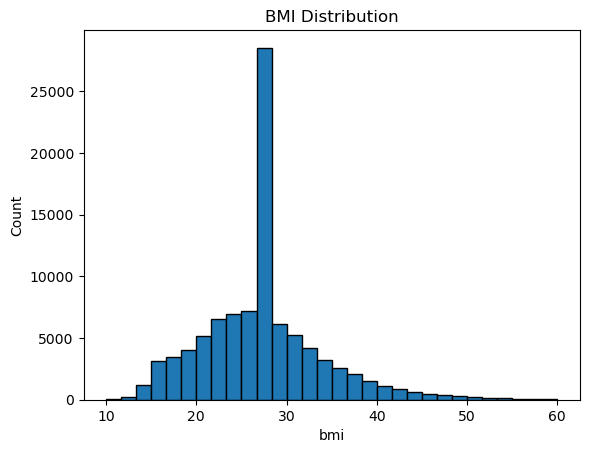

In [47]:
plt.hist(data['bmi'], bins=30, edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('bmi')
plt.ylabel('Count')
plt.show()

In [48]:
#check normality in age variable
print('check norality in bmi variable \n')
check_normality('bmi')

check norality in bmi variable 

Shapiro-Wilk Test: ShapiroResult(statistic=0.9442731738090515, pvalue=0.0) 

Kolmogorov-Smirnov Test: KstestResult(statistic=0.1465245264845636, pvalue=0.0, statistic_location=0.009565456649790856, statistic_sign=1) 

Skewness: 0.8220995620693629 



The histogram depicts the distribution of Body Mass Index (BMI) values within a dataset.
The x-axis represents the BMI values grouped into bins, and the y-axis represents the count of individuals within each bin. The distribution is notably peaked around the 25-30 range, which indicates that a large number of individuals have BMI values within this range. This peak suggests that the most common BMI category in the dataset is in the "overweight" range, as a BMI from 25 to 29.9 is generally considered overweight.

After this peak, the counts drastically drop for higher BMI values, indicating fewer individuals with a BMI in the obese (BMI of 30 and above) and severely obese categories. There's also a tail extending towards the higher BMI values, reflecting the presence of individuals with much higher BMI measures in the dataset.

At a statistical level, the distribution is not symmetric; it is positively skewed, as indicated by the long right tail. This type of skewness suggests that while most individuals have a BMI near the mode of the distribution, there is a subset of individuals with much higher BMI values.

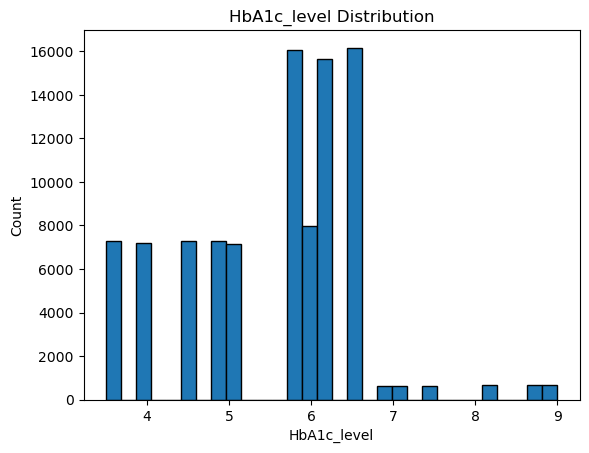

In [49]:
plt.hist(data['HbA1c_level'], bins=30, edgecolor='black')
plt.title('HbA1c_level Distribution')
plt.xlabel('HbA1c_level')
plt.ylabel('Count')
plt.show()

In [50]:
#check normality in age variable
print('check norality in HbA1c_level variable \n')
check_normality('HbA1c_level')

check norality in HbA1c_level variable 

Shapiro-Wilk Test: ShapiroResult(statistic=0.9308489561080933, pvalue=0.0) 

Kolmogorov-Smirnov Test: KstestResult(statistic=0.18482286708891077, pvalue=0.0, statistic_location=0.15672029557827638, statistic_sign=-1) 

Skewness: -0.05592999111260637 



The histogram shown represents the distribution of HbA1c level values in a dataset.The x-axis represents the HbA1c level, and the y-axis indicates the count of individuals with those levels. The distribution has several peaks, which is characteristic of a multimodal distribution. In this case, the histogram displays a notable peak around the HbA1c level of 6. The distribution suggests that there are significant counts of individuals with HbA1c levels around 4 to 6. 

Statistically, the distribution is not uniform and shows multiple peaks, making it multimodal. The presence of distinct peaks can indicate different subpopulations within the dataset, each with its own average HbA1c level. For instance, one peak could represent healthy individuals, another could represent those with prediabetes, and a third could represent those with diabetes.

The multimodal nature indicates that the overall distribution is not normal (Gaussian), as a normal distribution would have only one peak. The distribution is skewed to the right, showing a longer tail extending toward higher HbA1c levels.

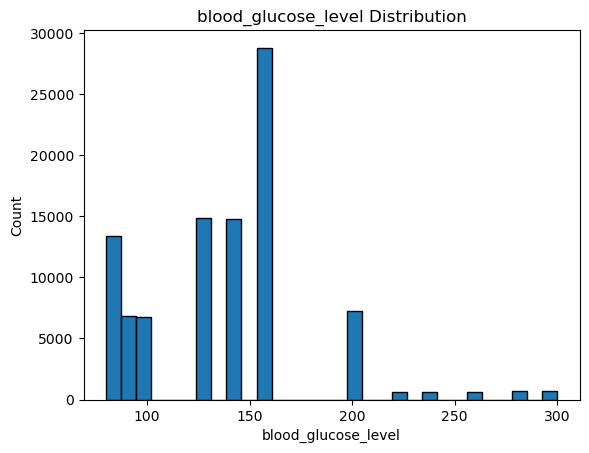

In [51]:
plt.hist(data['blood_glucose_level'], bins=30, edgecolor='black')
plt.title('blood_glucose_level Distribution')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count')
plt.show()

In [52]:
#check normality in age variable
print('check norality in blood_glucose_level variable \n')
check_normality('blood_glucose_level')

check norality in blood_glucose_level variable 

Shapiro-Wilk Test: ShapiroResult(statistic=0.9031844139099121, pvalue=0.0) 

Kolmogorov-Smirnov Test: KstestResult(statistic=0.18722995843112233, pvalue=0.0, statistic_location=0.5331582591177314, statistic_sign=1) 

Skewness: 0.8347919477126942 



The histogram illustrates the distribution of blood glucose level values within a dataset.On the x-axis, we have the blood glucose levels grouped into bins, while the y-axis represents the count of individuals falling into each bin. The distribution has a prominent peak around the 150 range. This central peak suggests that the majority of individuals have blood glucose levels around this value.
After the central peak, there's a substantial drop-off in frequency as the blood glucose levels increase, with very few individuals having extremely high blood glucose levels (e.g., close to 300), which would be indicative of severe hyperglycemia.

From a statistical perspective, the distribution is positively skewed, as indicated by the long tail to the right, showing that there are individuals with higher blood glucose levels, although they are less common.

The histogram is unimodal with one prominent peak, and it does not follow a normal distribution, which would exhibit a symmetrical bell-shaped curve

In [53]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, kstest, skew, boxcox

def test_transformations_normality(data, variable_name):
    # Ensure there are no non-positive values for log and Box-Cox transformations
    data = data[data[variable_name] > 0]
    results = {}

    # Define transformations
    transformations = {
        'log': np.log,
        'sqrt': np.sqrt,
        'inverse': lambda x: 1 / x,
        'boxcox': lambda x: boxcox(x)[0]  # Boxcox returns a tuple (data, lambda)
    }

    # Apply transformations and test normality
    for name, transform_function in transformations.items():
        transformed_data = transform_function(data[variable_name])
        
        # Shapiro-Wilk test
        shapiro_stat, shapiro_p = shapiro(transformed_data)
        
        # Kolmogorov-Smirnov test
        ks_stat, ks_p = kstest((transformed_data - transformed_data.mean()) / transformed_data.std(), 'norm')
        
        # Skewness
        skewness_val = skew(transformed_data)
        
        # Store results
        results[name] = {
            'Shapiro-Wilk Test': {'Statistic': shapiro_stat, 'p-value': shapiro_p},
            'Kolmogorov-Smirnov Test': {'Statistic': ks_stat, 'p-value': ks_p},
            'Skewness': skewness_val
        }
    
    return results



In [54]:
test_transformations_normality(data, 'age')

{'log': {'Shapiro-Wilk Test': {'Statistic': 0.7973634600639343,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.16476379131599084,
   'p-value': 0.0},
  'Skewness': -2.022805439745811},
 'sqrt': {'Shapiro-Wilk Test': {'Statistic': 0.9433401226997375,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.0867272353599281, 'p-value': 0.0},
  'Skewness': -0.7158460094282276},
 'inverse': {'Shapiro-Wilk Test': {'Statistic': 0.13339900970458984,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.42762620903562876,
   'p-value': 0.0},
  'Skewness': 20.264329623412575},
 'boxcox': {'Shapiro-Wilk Test': {'Statistic': 0.9663304686546326,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.05848157739543136,
   'p-value': 1.7550159883684636e-285},
  'Skewness': -0.2920814515497411}}

In [55]:
test_transformations_normality(data, 'bmi')

{'log': {'Shapiro-Wilk Test': {'Statistic': 0.9695518612861633,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.1268203305731782, 'p-value': 0.0},
  'Skewness': -0.18086811648328965},
 'sqrt': {'Shapiro-Wilk Test': {'Statistic': 0.9673141241073608,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.12266030805021677,
   'p-value': 0.0},
  'Skewness': 0.30678343731738467},
 'inverse': {'Shapiro-Wilk Test': {'Statistic': 0.9187251329421997,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.1677336706689827, 'p-value': 0.0},
  'Skewness': 1.0923088894504582},
 'boxcox': {'Shapiro-Wilk Test': {'Statistic': 0.9712199568748474,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.11755889012702314,
   'p-value': 0.0},
  'Skewness': 0.010872521515696322}}

In [56]:
test_transformations_normality(data, 'HbA1c_level')

{'log': {'Shapiro-Wilk Test': {'Statistic': 0.9132254719734192,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.21915994340191075,
   'p-value': 0.0},
  'Skewness': -0.5861849040024686},
 'sqrt': {'Shapiro-Wilk Test': {'Statistic': 0.9263883233070374,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.2026305944653301, 'p-value': 0.0},
  'Skewness': -0.3410894982038727},
 'inverse': {'Shapiro-Wilk Test': {'Statistic': 0.8695937395095825,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.24726587027861585,
   'p-value': 0.0},
  'Skewness': 0.9946818717326132},
 'boxcox': {'Shapiro-Wilk Test': {'Statistic': 0.9314606189727783,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.18161464683011624,
   'p-value': 0.0},
  'Skewness': -0.0012558436467051497}}

In [57]:
test_transformations_normality(data, 'blood_glucose_level')

{'log': {'Shapiro-Wilk Test': {'Statistic': 0.9251572489738464,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.15224085625276323,
   'p-value': 0.0},
  'Skewness': -0.09404616598504871},
 'sqrt': {'Shapiro-Wilk Test': {'Statistic': 0.9248895645141602,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.1658601422299808, 'p-value': 0.0},
  'Skewness': 0.3149878177105052},
 'inverse': {'Shapiro-Wilk Test': {'Statistic': 0.8848585486412048,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.2111766390316192, 'p-value': 0.0},
  'Skewness': 0.6437934877317811},
 'boxcox': {'Shapiro-Wilk Test': {'Statistic': 0.9265245199203491,
   'p-value': 0.0},
  'Kolmogorov-Smirnov Test': {'Statistic': 0.1536882354643625, 'p-value': 0.0},
  'Skewness': -0.0034146001643087205}}

According to the test results, all tested columns deviate from the normal ditribution

##### Under the analysis , it is important to analysis BMI==27.32 because majority of patients have that BMI value.

In [58]:
data.query('bmi == 27.32').sample(10)

gender   age hypertension heart_disease smoking_history    bmi  \
29386  Female  27.0            1             0         No Info  27.32   
91514    Male  61.0            1             0         No Info  27.32   
9945     Male  24.0            0             0         No Info  27.32   
26955  Female  31.0            0             0          former  27.32   
30965    Male  16.0            0             0         No Info  27.32   
23248  Female  57.0            0             0         current  27.32   
30934  Female  50.0            0             0           never  27.32   
59586    Male  36.0            0             0         current  27.32   
44721  Female   4.0            0             0         No Info  27.32   
62235  Female  52.0            0             0           never  27.32   

       HbA1c_level  blood_glucose_level diabetes  HbA1c_level_scaled  
29386          6.6                  159        0            0.994563  
91514          3.5                  140        0           -1.893923  
9945           5.0                   90        0           -0.496269  
26955          6.6                  140        0            0.994563  
30965          6.6                   85        0            0.994563  
23248          7.0                  126        1            1.367271  
30934          5.0                  160        0           -0.496269  
59586          4.5                  126        0           -0.962154  
44721          4.0                   80        0           -1.428039  
62235          6.1                  140        0            0.528678

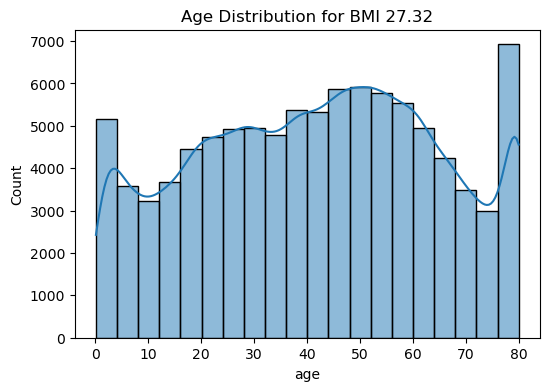

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


# Histogram for age distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution for BMI 27.32')
plt.show()


This plot shows that age <= 18 kids also have BMI = 27.32. 
Let's focus on that.
Accrding to the kids MBI chart (https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/about_childrens_bmi.html) it is not a good health status to have BMI = 27.32


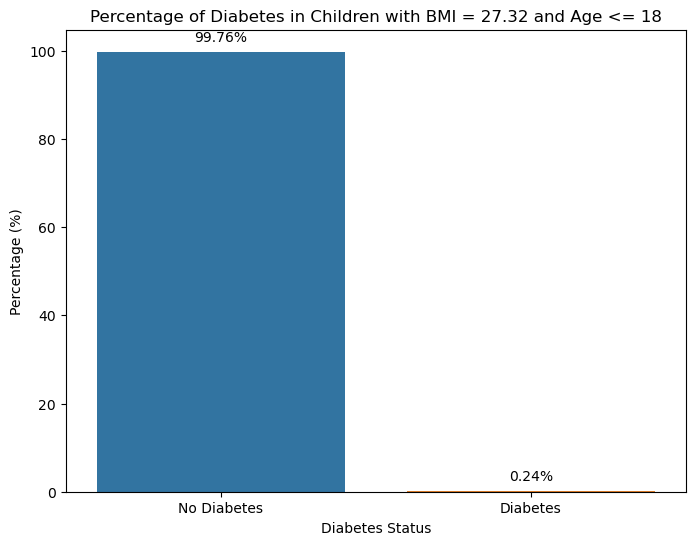

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for children (age <= 18) with a BMI of 27.32
children_bmi_2732 = data[(data['bmi'] == 27.32) & (data['age'] <= 18)]

# Check if any of these children have diabetes
diabetes_in_children = children_bmi_2732['diabetes'].value_counts()

diabetes_in_children_percentage = children_bmi_2732['diabetes'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=diabetes_in_children.index, y=diabetes_in_children_percentage.values)

# Title and labels
plt.title('Percentage of Diabetes in Children with BMI = 27.32 and Age <= 18')
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  

# Annotating each bar with its corresponding percentage value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f') + '%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

It's certainly possible for kids to have a BMI of 27.32 without having diabetes. BMI, or Body Mass Index, is a measure of body fat based on height and weight that applies to both adult men and women, as well as children. It's a screening tool and does not diagnose body fatness or health.

Diabetes in children, particularly type 1 diabetes, is not caused by overweight or obesity. Type 1 diabetes is an autoimmune condition, and while its exact cause is unknown, the child's own immune system mistakenly destroys the insulin-producing cells in the pancreas.

For type 2 diabetes, which is more commonly associated with overweight and obesity, having a high BMI can be a risk factor. However, not all children with a high BMI will develop type 2 diabetes; other factors such as family history, race, and certain health issues also contribute to the risk.


Hence it is impossible to remove the records which is age <= 18 and BMI =27.32

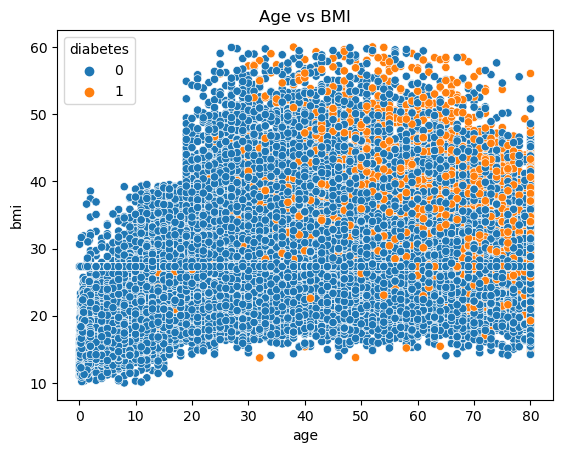

In [61]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=data)
plt.title('Age vs BMI')
plt.show()

In [62]:
# Create a boolean filter for the conditions
filter = ~((data['age'] <= 18) & (data['bmi'] == 27.32))
data = data[filter]

In [63]:
data.shape

(92988, 10)

In [64]:
data

gender   age hypertension heart_disease smoking_history    bmi  \
0      Female  80.0            0             1           never  25.19   
1      Female  54.0            0             0         No Info  27.32   
2        Male  28.0            0             0           never  27.32   
3      Female  36.0            0             0         current  23.45   
4        Male  76.0            1             1         current  20.14   
...       ...   ...          ...           ...             ...    ...   
99994  Female  36.0            0             0         No Info  24.60   
99996  Female   2.0            0             0         No Info  17.37   
99997    Male  66.0            0             0          former  27.83   
99998  Female  24.0            0             0           never  35.42   
99999  Female  57.0            0             0         current  22.43   

       HbA1c_level  blood_glucose_level diabetes  HbA1c_level_scaled  
0              6.6                  140        0            0.994563  
1              6.6                   80        0            0.994563  
2              5.7                  158        0            0.155970  
3              5.0                  155        0           -0.496269  
4              4.8                  155        0           -0.682623  
...            ...                  ...      ...                 ...  
99994          4.8                  145        0           -0.682623  
99996          6.5                  100        0            0.901386  
99997          5.7                  155        0            0.155970  
99998          4.0                  100        0           -1.428039  
99999          6.6                   90        0            0.994563  

[92988 rows x 10 columns]

In [65]:
## Ref:https://www.kaggle.com/code/kareemellithy/diabeties-prediction-eda-svm

#Function for creat bat chart and pie chart for categorical variabes
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Countplot
    sns.countplot(x=data[col],data=data ,palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')
    
    # Pie plot
    data_counts = data[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')
    
    plt.show()


    

 Univariate analysis for gender column:


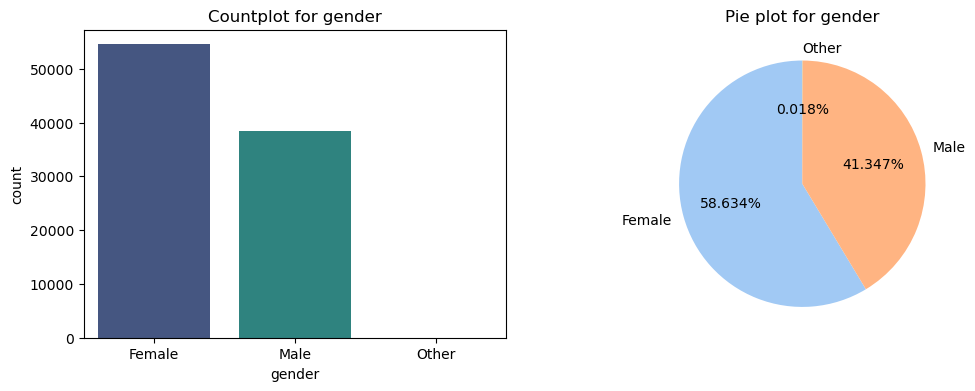

In [66]:
#apply for gender
print(f' Univariate analysis for gender column:')
univariate_analysis_cat('gender')

The countplot displays the number of records for each gender category.
It appears that the dataset contains more female participants than male. The majority of the dataset is composed of females (58.634%), followed by males (41.347%), and a very small percentage of records are from the "Other" category (0.018%).
A third category labeled "Other" has a count so low it is barely visible on the countplot.

Hence the 'other' category have very small amout of data records - it is possible to remove them from the data set.


In [67]:
# Filter out the rows where 'gender' is 'Other'
data = data[data['gender'] != 'Other']

 Univariate analysis for hypertension column:


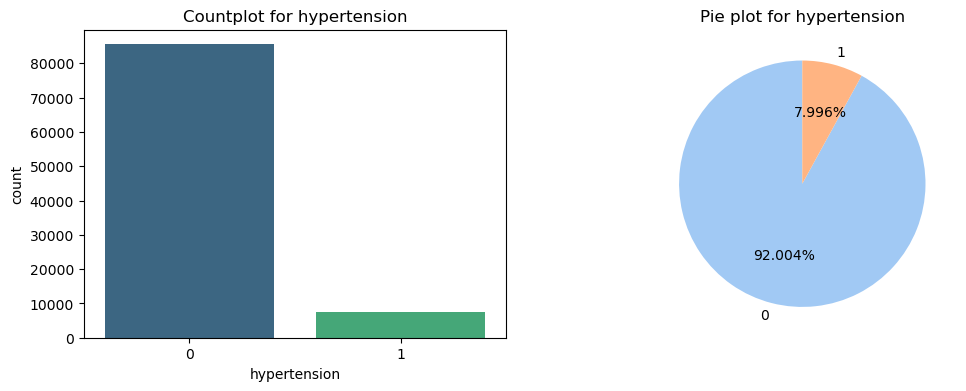

In [68]:
print(f' Univariate analysis for hypertension column:')
univariate_analysis_cat('hypertension')

The vast majority do not have hypertension.A small slice (7.996%) represents individuals with hypertension.The graphical representations suggest that within this dataset, hypertension is relatively uncommon.This could indicate that hypertension may not be a primary concern for the majority of this sample, or it might reflect sampling bias or population demographics.

 Univariate analysis for heart_disease column:


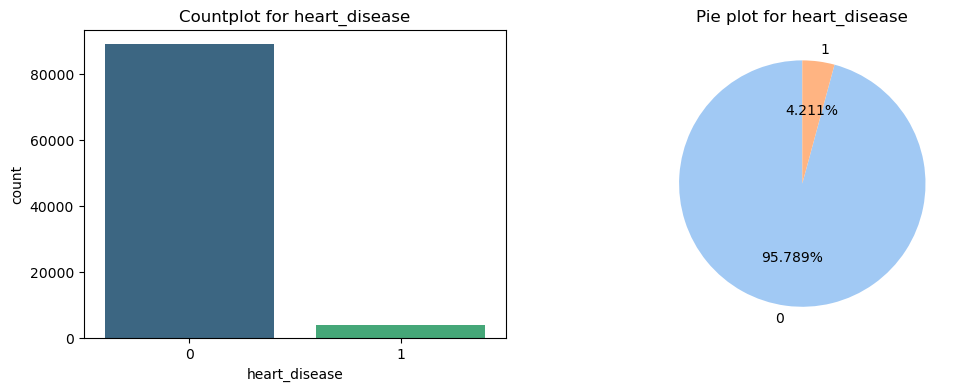

In [69]:
print(f' Univariate analysis for heart_disease column:')
univariate_analysis_cat('heart_disease')

The charts offer a clear visual depiction of the proportion of individuals with and without heart disease in the dataset.
Only a small fraction (4.211%) of the population has heart disease.

 Univariate analysis for smoking_history column:


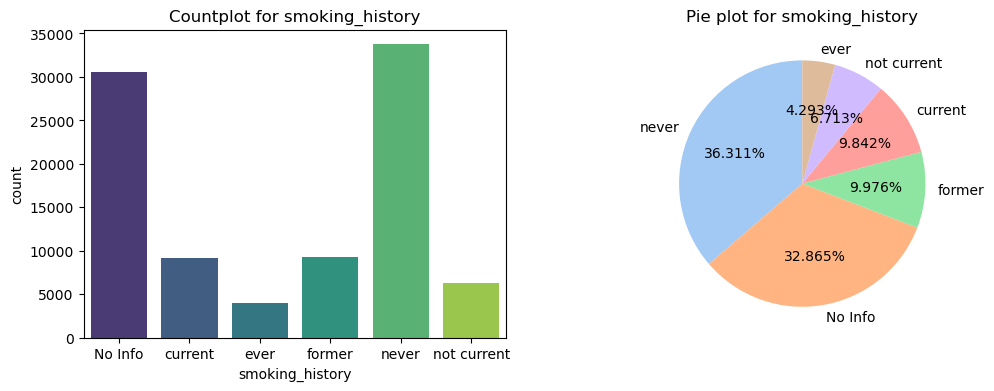

In [70]:
print(f' Univariate analysis for smoking_history column:')
univariate_analysis_cat('smoking_history')

A large number of individuals do not have smoking history information available ("No Info").The "never" category has the second-largest count, suggesting many individuals have never smoked.The counts for current and former smokers are lower, indicating a smaller proportion of the dataset's population engages in or has engaged in smoking.


In here it is possible to combine categories.

Combine 'current' and 'former' into an 'Ever Smoked' category.
Combine 'never' and 'not current' into a 'Non-Smoker' category.
Keep No info as still

In [71]:
# Combine 'current' and 'former' into an 'Ever Smoked' category
data['smoking_status'] = data['smoking_history'].replace({'current': 'Ever_Smoked', 'former': 'Ever_Smoked', 'ever': 'Ever_Smoked'})

# Combine 'never' and 'not current' into a 'Non-Smoker' category
data['smoking_status'] = data['smoking_status'].replace({'never': 'Non_Smoker', 'not current': 'Non_Smoker'})


C:\Users\wpdev\AppData\Local\Temp\ipykernel_18708\2134251364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_status'] = data['smoking_history'].replace({'current': 'Ever_Smoked', 'former': 'Ever_Smoked', 'ever': 'Ever_Smoked'})
C:\Users\wpdev\AppData\Local\Temp\ipykernel_18708\2134251364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_status'] = data['smoking_status'].replace({'never': 'Non_Smoker', 'not current': 'Non_Smoker'})


 Univariate analysis for smoking_history column:


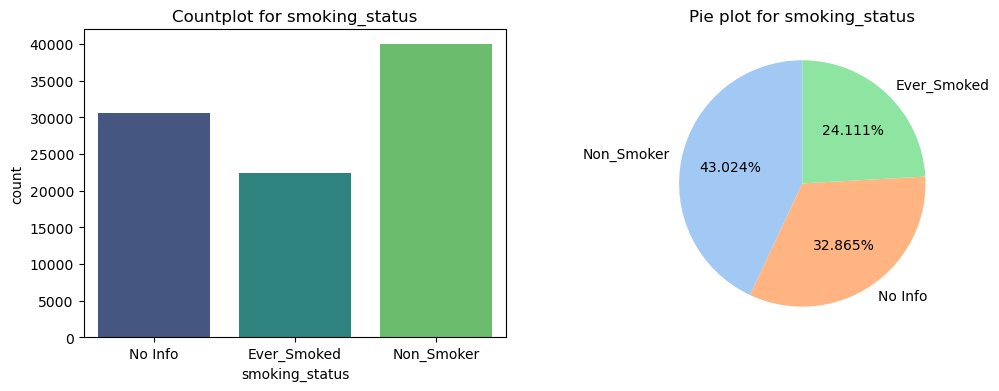

In [72]:
print(f' Univariate analysis for smoking_history column:')
univariate_analysis_cat('smoking_status')

Since we combine categories, we can drop smoking_history column from the data set

In [73]:
# Drop the 'smoking_history' column
data.drop(columns=['smoking_history'], inplace=True)

C:\Users\wpdev\AppData\Local\Temp\ipykernel_18708\2214162001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['smoking_history'], inplace=True)


 Univariate analysis for diabetes column:


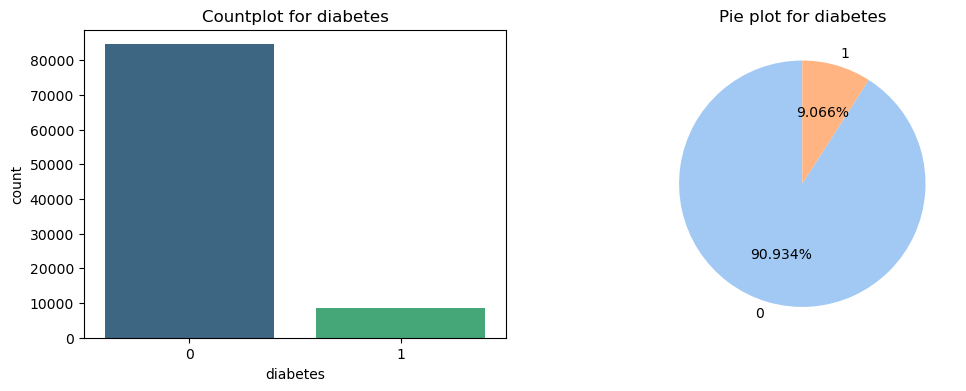

In [74]:
print(f' Univariate analysis for diabetes column:')
univariate_analysis_cat('diabetes')

The target variable (Diametes) is a binary distribution. According to the 2 charts, 1 class in very small portition which is 9.07% of total. Which is indicates that patients who already have diabetes is very low. 


#### MULTIVARIATE ANALYSIS

In [75]:
# Check the structure of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92971 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               92971 non-null  category
 1   age                  92971 non-null  float64 
 2   hypertension         92971 non-null  category
 3   heart_disease        92971 non-null  category
 4   bmi                  92971 non-null  float64 
 5   HbA1c_level          92971 non-null  float64 
 6   blood_glucose_level  92971 non-null  int64   
 7   diabetes             92971 non-null  category
 8   HbA1c_level_scaled   92971 non-null  float64 
 9   smoking_status       92971 non-null  category
dtypes: category(5), float64(4), int64(1)
memory usage: 4.7 MB


In [76]:
numeric_col=[]
non_numeric_col=[]
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        if(data[column].nunique()<3):
            non_numeric_col.append(column)
        else:
            numeric_col.append(column)
    else:
        non_numeric_col.append(column)

In [77]:
print(numeric_col)
print(non_numeric_col)

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'HbA1c_level_scaled']
['gender', 'hypertension', 'heart_disease', 'diabetes', 'smoking_status']


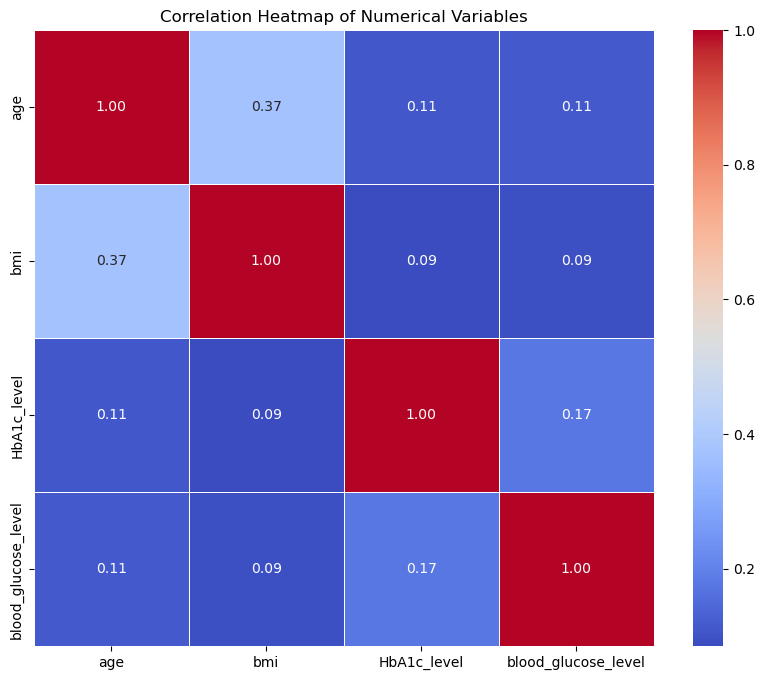

In [78]:
# Subset the dataframe to include only the numerical variables
numerical_data = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

The heatmap visualizes the correlation coefficients between pairs of numerical variables.The heatmap provides valuable insights into the relationships between numerical variables in the dataset.

There are no high positive or negative correlations between numerical variables.

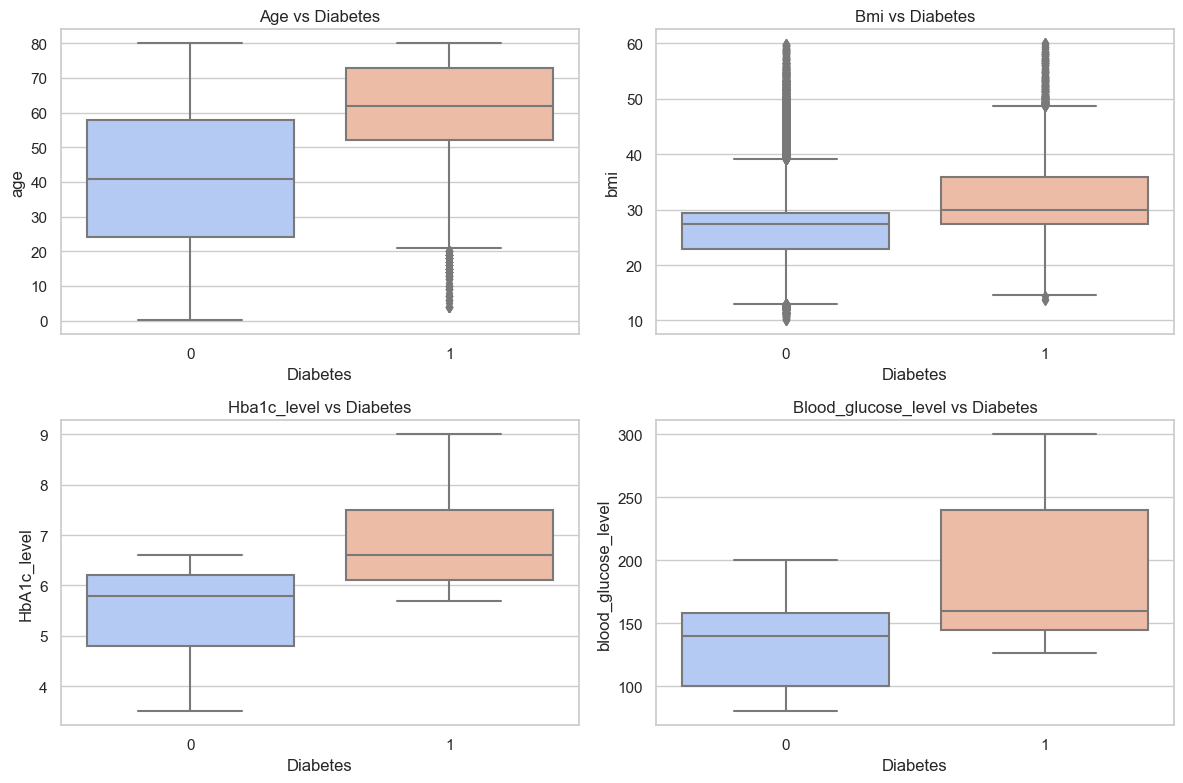

In [79]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot box plots for numerical variables with diabetes
plt.figure(figsize=(12, 8))
for i, col in enumerate(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='diabetes', y=col, data=data, palette="coolwarm")
    plt.title(f'{col.capitalize()} vs Diabetes')
    plt.xlabel('Diabetes')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

These 4 charts indicates the relarionship between each and every numerical variables with categorical diabetes variable.

Age: the median age for individuals with diabetes appears slightly higher than for those without diabetes.

BMI: Individuals with diabetes seem to have, on average, a higher BMI compared to those without diabetes.

HbA1c Level : Individuals with diabetes appear to have higher median HbA1c levels compared to those without diabetes, indicating poorer blood sugar control.

Blood Glucose Level :The box plot highlights that individuals with diabetes have higher median blood glucose levels compared to those without diabetes.

In [80]:
from scipy.stats import chi2_contingency

# Create a list of categorical variables
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'diabetes', 'smoking_status']

# Perform chi-square test for each pair of categorical variables
for i in range(len(categorical_vars)):
    for j in range(i+1, len(categorical_vars)):
        contingency_table = pd.crosstab(data[categorical_vars[i]], data[categorical_vars[j]])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-square test between {categorical_vars[i]} and {categorical_vars[j]}:")
        print("Chi-square statistic:", chi2)
        print("P-value:", p)
        print("\n")


Chi-square test between gender and hypertension:
Chi-square statistic: 23.917291455988398
P-value: 1.0056442333045626e-06


Chi-square test between gender and heart_disease:
Chi-square statistic: 610.9994811516028
P-value: 6.782037353082038e-135


Chi-square test between gender and diabetes:
Chi-square statistic: 153.2275793430179
P-value: 3.416142741759932e-35


Chi-square test between gender and smoking_status:
Chi-square statistic: 992.4574545458587
P-value: 3.094581917410873e-216


Chi-square test between hypertension and heart_disease:
Chi-square statistic: 1302.5191197373208
P-value: 3.2046608975601078e-285


Chi-square test between hypertension and diabetes:
Chi-square statistic: 3473.5346417565142
P-value: 0.0


Chi-square test between hypertension and smoking_status:
Chi-square statistic: 1150.0920734412005
P-value: 1.8225498333179e-250


Chi-square test between heart_disease and diabetes:
Chi-square statistic: 2664.069033597192
P-value: 0.0


Chi-square test between heart_dis

A chi-square test between pairs of categorical variables is a statistical test used to determine if there is a significant association between two categorical variables. 
If the p-value is below a chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant association between the variables.

* Gender and Hypertension:
There is a significant association between gender and hypertension (p-value < 0.05), suggesting that the distribution of hypertension status differs between genders.
* Gender and Heart Disease:
There is a highly significant association between gender and heart disease (p-value < 0.05), indicating that the distribution of heart disease status differs significantly between genders.
* Gender and Diabetes:
There is a highly significant association between gender and diabetes (p-value < 0.05), suggesting that the distribution of diabetes status differs significantly between genders.
* Gender and Smoking Status:
There is a highly significant association between gender and smoking status (p-value < 0.05), indicating that the distribution of smoking status differs significantly between genders.
* Hypertension and Heart Disease:
There is a highly significant association between hypertension and heart disease (p-value < 0.05), suggesting that individuals with hypertension are more likely to have heart disease, and vice versa.
* Hypertension and Diabetes:
There is a highly significant association between hypertension and diabetes (p-value < 0.05), indicating a strong relationship between these conditions.
* Hypertension and Smoking Status:
There is a highly significant association between hypertension and smoking status (p-value < 0.05), suggesting that individuals with hypertension may have different smoking behaviors.
* Heart Disease and Diabetes:
There is a highly significant association between heart disease and diabetes (p-value < 0.05), indicating that individuals with heart disease are more likely to have diabetes, and vice versa.
* Heart Disease and Smoking Status:
There is a highly significant association between heart disease and smoking status (p-value < 0.05), suggesting that individuals with heart disease may have different smoking behaviors.
* Diabetes and Smoking Status:
There is a highly significant association between diabetes and smoking status (p-value < 0.05), indicating that individuals with diabetes may have different smoking behaviors.



### FEATURE SCALING AND ENCODING

#### Apply StandardScaler to all numerical variables

In [83]:
from sklearn.preprocessing import StandardScaler

# Select only the numerical variables
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical variables
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

C:\Users\wpdev\AppData\Local\Temp\ipykernel_5772\1396463561.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


StandardScaler is a preprocessing technique is used in machine learning to scale numerical features. 

In [84]:
from sklearn.preprocessing import MinMaxScaler

# Select only the numerical variables
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical variables
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

C:\Users\wpdev\AppData\Local\Temp\ipykernel_5772\2477183949.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


MinMaxScaler scales the numerical features to a specified range, typically between 0 and 1.MinMaxScaler scales the features to a specified range, typically between 0 and 1.

#### Encoding to categorical variables

In [81]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Perform label encoding to gender
data['gender'] = encoder.fit_transform(data['gender'])

# Perform label encoding to smoking_status
data['smoking_status'] = encoder.fit_transform(data['smoking_status'])

C:\Users\wpdev\AppData\Local\Temp\ipykernel_18708\3962047198.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = encoder.fit_transform(data['gender'])
C:\Users\wpdev\AppData\Local\Temp\ipykernel_18708\3962047198.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_status'] = encoder.fit_transform(data['smoking_status'])


In [82]:
data

gender   age hypertension heart_disease    bmi  HbA1c_level  \
0           0  80.0            0             1  25.19          6.6   
1           0  54.0            0             0  27.32          6.6   
2           1  28.0            0             0  27.32          5.7   
3           0  36.0            0             0  23.45          5.0   
4           1  76.0            1             1  20.14          4.8   
...       ...   ...          ...           ...    ...          ...   
99994       0  36.0            0             0  24.60          4.8   
99996       0   2.0            0             0  17.37          6.5   
99997       1  66.0            0             0  27.83          5.7   
99998       0  24.0            0             0  35.42          4.0   
99999       0  57.0            0             0  22.43          6.6   

       blood_glucose_level diabetes  HbA1c_level_scaled  smoking_status  
0                      140        0            0.994563               2  
1                       80        0            0.994563               1  
2                      158        0            0.155970               2  
3                      155        0           -0.496269               0  
4                      155        0           -0.682623               0  
...                    ...      ...                 ...             ...  
99994                  145        0           -0.682623               1  
99996                  100        0            0.901386               1  
99997                  155        0            0.155970               0  
99998                  100        0           -1.428039               2  
99999                   90        0            0.994563               0  

[92971 rows x 10 columns]

### MODEL FITTING

#### Class Imbalance

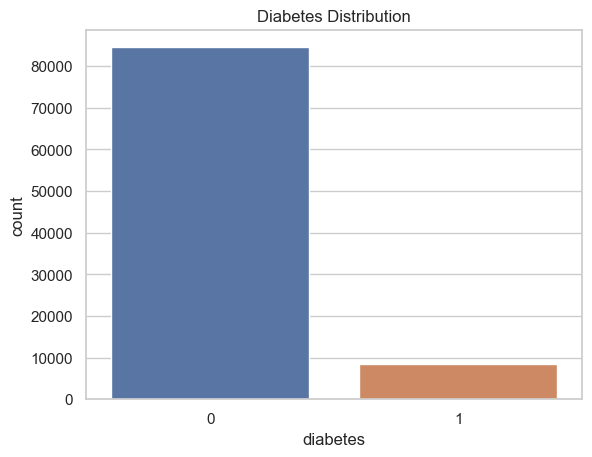

In [83]:
sns.countplot(x='diabetes', data=data)
plt.title('Diabetes Distribution')
plt.show()

From the EDA and as well as from the above grap, there is a clear class imbalance in target variable. It is essential to balance the data to ensure that the model doesn't get biased towards the majority class. 

"Over sampling and under sampling are techniques used in data mining and data analytics to modify unequal data classes to create balanced data sets. Over sampling and under sampling are also known as resampling."

Ref: https://www.techtarget.com/whatis/definition/over-sampling-and-under-sampling

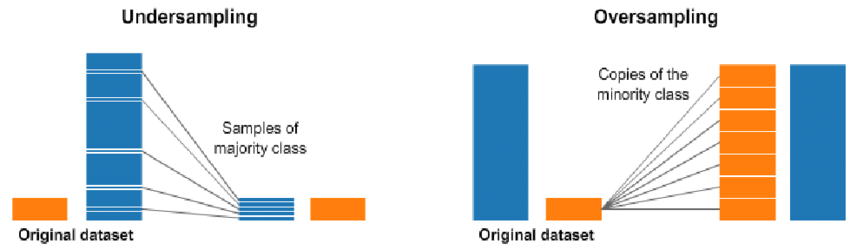

Both over sampling and under sampling will apply and fit the model to the dataset.

In [84]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

In [85]:
data_sampling = data

In [86]:
x = data_sampling.drop(columns=['diabetes']).values
y = data_sampling['diabetes'].values

#### Under sampline

In [87]:
under = RandomUnderSampler(sampling_strategy=1)
x_u, y_u = under.fit_resample(x, y)
print(Counter(y_u))

Counter({0: 8429, 1: 8429})


RandomUnderSampler to balance the classes in an imbalanced dataset by under-sampling the majority class. In this case, the sampling_strategy parameter is set to 1, indicating that the majority class will be under-sampled to have the same number of samples as the minority class.

####  MODEL FITTING WITH UNDER SAMPLING DATA

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x_u,y_u, test_size = 0.20)

Spliting dataset into training and testing datasets

##### Logistic Regression

In [95]:
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=200, solver='liblinear')

Accuracy result of Train
Accuracy: 87.83%
Logistic Regression Classification Report: Train
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6715
           1       0.88      0.87      0.88      6771

    accuracy                           0.88     13486
   macro avg       0.88      0.88      0.88     13486
weighted avg       0.88      0.88      0.88     13486

Accuracy result of Validation
Accuracy: 88.97%
Logistic Regression Classification Report: Validation
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1714
           1       0.89      0.89      0.89      1658

    accuracy                           0.89      3372
   macro avg       0.89      0.89      0.89      3372
weighted avg       0.89      0.89      0.89      3372



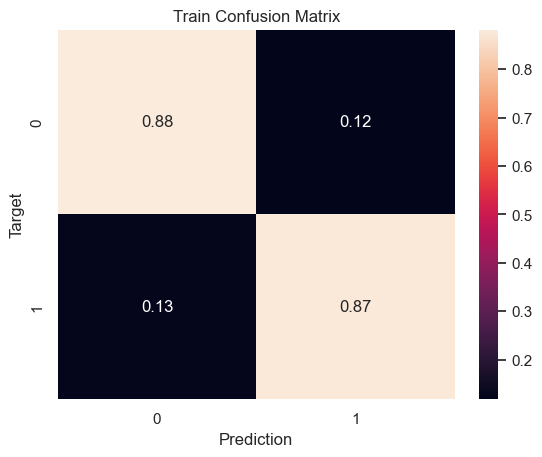

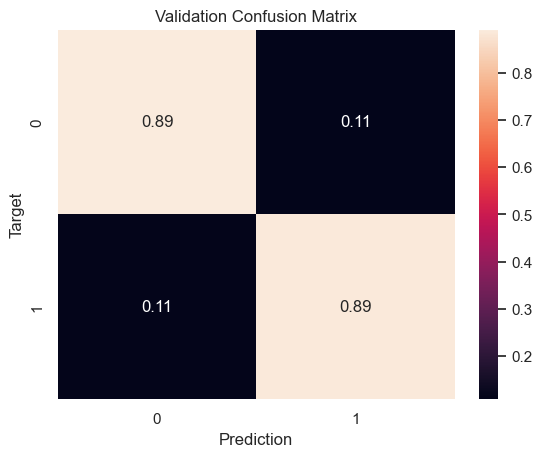

In [97]:
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy result of", name)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    print("Logistic Regression Classification Report:",name)
    print(classification_report(targets, preds))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))


# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')


# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')


In this case, C=1 means moderate regularization.A value of 1 is often a reasonable default choice for C. It allows the model to balance between fitting the training data well and avoiding overfitting by penalizing large coefficient values.

The penalty parameter specifies the norm used in the penalization.L2 regularization (ridge regularization) penalizes the square of the magnitude of coefficients. It is commonly used to prevent overfitting by discouraging overly complex models.

The solver parameter specifies the algorithm used for optimization. It can handle both L1 and L2 penalties and works well for binary classification problems.

The max_iter parameter specifies the maximum number of iterations taken for the solver to converge.Setting max_iter=200 ensures that the solver has sufficient iterations to converge to a solution, especially if the default value is not adequate for convergence.

The accuracy of the training dataset is 87.83%, and for the validation dataset, it's slightly higher at 88.97%.

From the information provided, it seems that the model is performing quite similarly on both the training and validation datasets, which suggests that the model is generalizing well to unseen data. The precision and recall values are balanced, which means the model is performing fairly consistently across both classes. The close accuracy between training and validation also suggests that there is no significant overfitting.

##### Decision Trees

In [96]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


Accuracy result of Train
Accuracy: 99.96%
Logistic Regression Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       1.00      1.00      1.00      6724

    accuracy                           1.00     13486
   macro avg       1.00      1.00      1.00     13486
weighted avg       1.00      1.00      1.00     13486

Accuracy result of Validation
Accuracy: 86.71%
Logistic Regression Classification Report: Validation
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1667
           1       0.87      0.87      0.87      1705

    accuracy                           0.87      3372
   macro avg       0.87      0.87      0.87      3372
weighted avg       0.87      0.87      0.87      3372



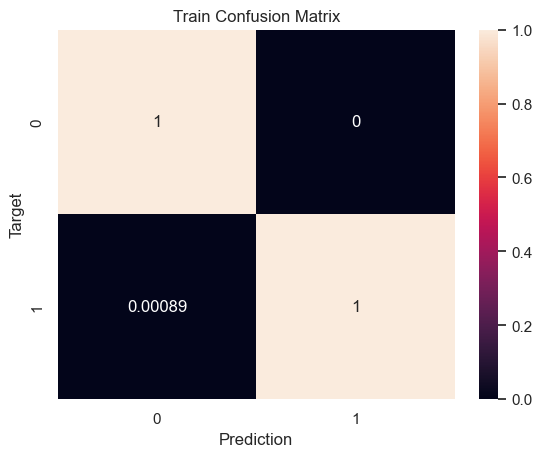

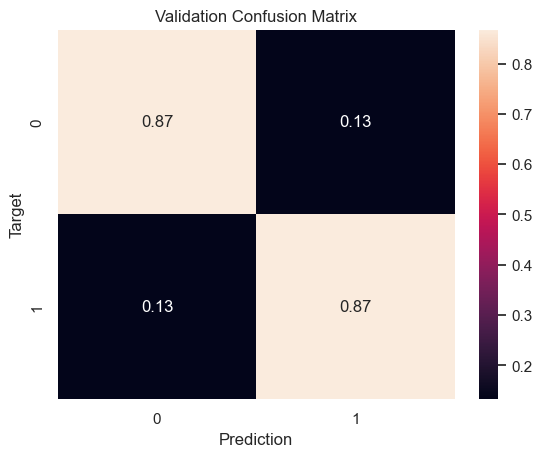

In [97]:
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy result of", name)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    print("Logistic Regression Classification Report:",name)
    print(classification_report(targets, preds))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))


# Predict and plot on the training data
train_preds = predict_and_plot(dt, X_train, y_train, 'Train')


# Predict and plot on the validation data
val_preds = predict_and_plot(dt, X_test, y_test, 'Validation')


The Decision Tree model has learned the training data too well, leading to near-perfect scores across all metrics. However, its performance on the validation set is notably worse, indicating that the model does not perform as well on data it hasn't seen before. This is a typical symptom of overfitting, where the model is overly complex and has learned the details and noise in the training dataset to the extent that it negatively impacts the performance on the validation set.

In [114]:

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Perform grid search to find the best model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


C:\Users\wpdev\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
235 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wpdev\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wpdev\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\wpdev\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\wpdev\anaconda3\Lib\site-packa

In [114]:
# Create the best DecisionTreeClassifier model with the best parameters
best_dt_model = DecisionTreeClassifier(criterion='gini',
                                       max_depth=10,
                                       max_features='log2',
                                       min_samples_leaf=2,
                                       min_samples_split=5,
                                       random_state=42)

# Fit the best model to the training data
best_dt_model.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = best_dt_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8893831553973903
Precision: 0.9075887392900857
Recall: 0.8697947214076246
F1-score: 0.8882899071578317


The optimized Decision Tree Classifier, as a result of the grid search, likely performs better on unseen data due to the constraints put in place that prevent overfitting. This is indicated by the improved metrics across the board on the test set. The Grid Search process has helped to balance the Decision Tree, allowing it to generalize better from the training data to the test data.

##### Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_jobs =-1, random_state = 42)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [103]:
rf_classifier.score(X_train,y_train)

0.999480943200356

Accuracy: 99.95%
Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       1.00      1.00      1.00      6724

    accuracy                           1.00     13486
   macro avg       1.00      1.00      1.00     13486
weighted avg       1.00      1.00      1.00     13486

Accuracy: 90.01%
Classification Report: Validation
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1667
           1       0.90      0.90      0.90      1705

    accuracy                           0.90      3372
   macro avg       0.90      0.90      0.90      3372
weighted avg       0.90      0.90      0.90      3372



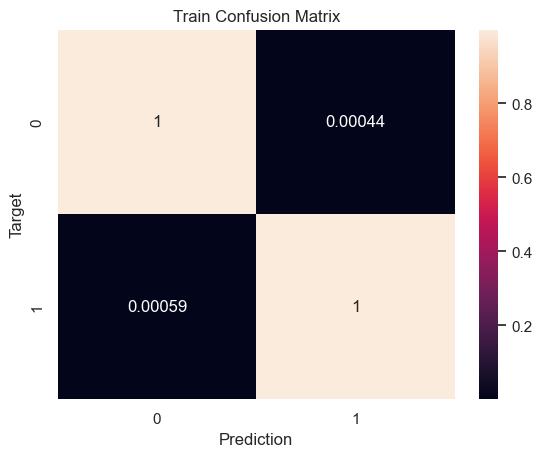

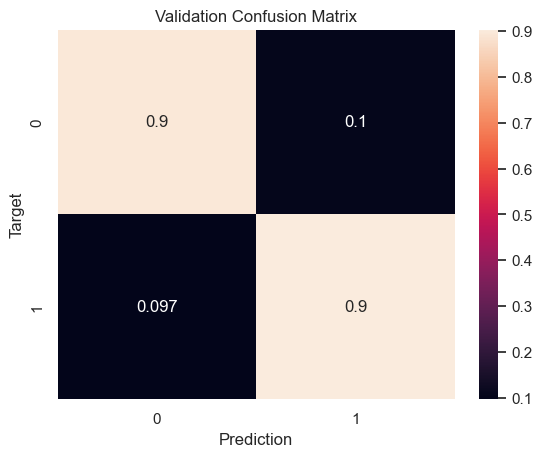

In [104]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
        
    print("Classification Report:",name)
    print(classification_report(targets, preds))
    
    
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return preds

train_preds = predict_and_plot(rf_classifier, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(rf_classifier, X_test, y_test, 'Validation')

The RandomForestClassifier has a higher validation accuracy compared to the previous Decision Tree model.
90.45% vs. 86.71% from the initial model and 89.29% from the optimized model.

Precision, recall, and F1-scores are also improved in the RandomForestClassifier compared to the previous Decision Tree model's validation metrics.

While there is a high degree of accuracy on the training set (nearly 100%), the model's accuracy on the validation set is lower. This discrepancy suggests a certain level of overfitting, though not as severe as with the standalone Decision Tree.

In [105]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Perform grid search to find the best model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)


C:\Users\wpdev\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
138 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wpdev\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wpdev\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\wpdev\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\wpdev\anaconda3\Lib\site-packa

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [106]:
# Create the best RandomForestClassifier model with the best parameters
best_rf_model = RandomForestClassifier(n_estimators=200,
                                       max_depth=10,
                                       max_features='sqrt',
                                       min_samples_leaf=4,
                                       min_samples_split=10,
                                       random_state=42,
                                       n_jobs=-1)

# Fit the best model to the training data
best_rf_model.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9071767497034401
Precision: 0.8927765237020316
Recall: 0.9278592375366569
F1-score: 0.909979867702042


The Grid Search process for the RandomForestClassifier has resulted in slight changes to the accuracy, precision, recall, and F1-score compared to the unoptimized RandomForest. It shows that the parameters obtained from the grid search led to a model that is potentially less overfitted, given the regularization introduced by the 'max_depth' and 'min_samples_split' parameters.

The metrics are quite close between the unoptimized and optimized RandomForestClassifier, which suggests that the default parameters of the RandomForestClassifier were already quite effective for this dataset.

##### Support Vector Machines (SVM)

In [107]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

Accuracy: 88.71%
Classification Report: Train
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6767
           1       0.89      0.89      0.89      6719

    accuracy                           0.89     13486
   macro avg       0.89      0.89      0.89     13486
weighted avg       0.89      0.89      0.89     13486

Accuracy: 88.26%
Classification Report: Validation
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1662
           1       0.88      0.89      0.89      1710

    accuracy                           0.88      3372
   macro avg       0.88      0.88      0.88      3372
weighted avg       0.88      0.88      0.88      3372



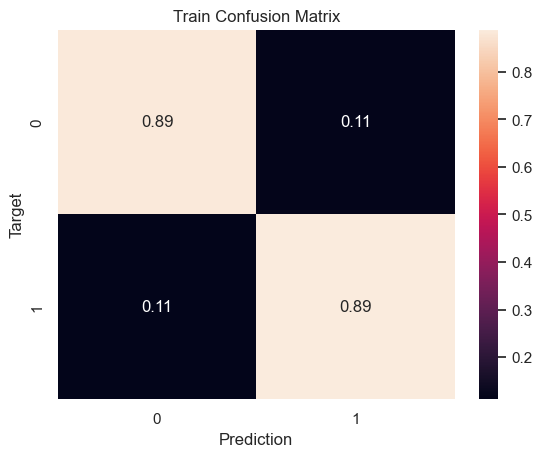

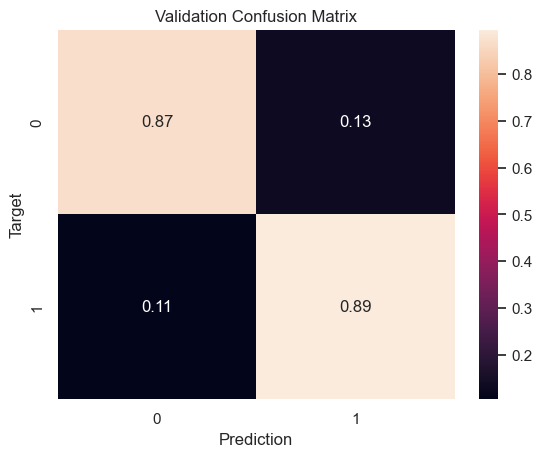

In [105]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
        
    print("Classification Report:",name)
    print(classification_report(targets, preds))
    
    
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return preds

train_preds = predict_and_plot(svm, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(svm, X_test, y_test, 'Validation')

The SVM classifier shows a balanced performance on the training and validation sets, with the accuracy figures being quite close, indicating it generalizes well without significant overfitting.

##### XGBoost Classifier

In [110]:
# Create and train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42,max_features='sqrt', n_estimators=100, max_depth=10)
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("XGBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

XGBoost Model Accuracy: 0.8911625148279952
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1667
           1       0.89      0.90      0.89      1705

    accuracy                           0.89      3372
   macro avg       0.89      0.89      0.89      3372
weighted avg       0.89      0.89      0.89      3372



C:\Users\wpdev\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:43:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


The XGBoost model demonstrates high accuracy, precision, recall, and F1-scores, indicative of a well-performing model on the given dataset.

It compares favorably with the other models, especially the optimized RandomForest, and exhibits competitive performance metrics.

XGBoost, being a boosting model, often outperforms single instance models like Decision Trees due to its ability to sequentially correct errors made by previous trees and reduce both bias and variance.

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Create the grid search object
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform grid search to find the best model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model_xgBoost = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Fit the best model to the training data
best_model_xgBoost.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = best_model_xgBoost.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Best XGBoost Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", report)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Best XGBoost Model Metrics:
Accuracy: 0.9071767497034401
Precision: 0.8959044368600683
Recall: 0.9237536656891495
F1-score: 0.9096159399364713
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1667
           1       0.90      0.92      0.91      1705

    accuracy                           0.91      3372
   macro avg       0.91      0.91      0.91      3372
weighted avg       0.91      0.91      0.91      3372



The tuning process has successfully improved the XGBoost model's performance, indicating the effectiveness of hyperparameter optimization.

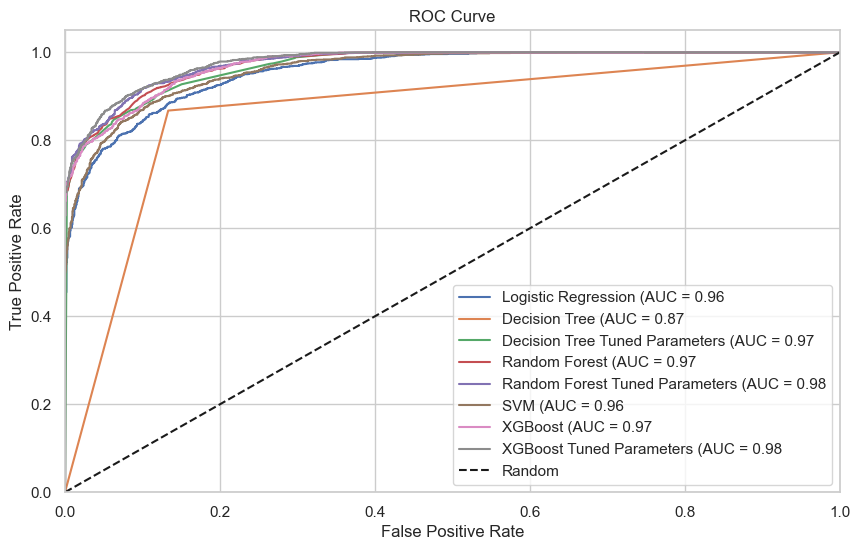

In [115]:
# Define a list of classifiers and their names excluding Linear Regression
classifiers = [log_reg,dt,best_dt_model,rf_classifier,best_rf_model,svm,xgb_classifier,best_model_xgBoost]
classifier_names = ["Logistic Regression","Decision Tree" , "Decision Tree Tuned Parameters", "Random Forest","Random Forest Tuned Parameters" ,"SVM","XGBoost", "XGBoost Tuned Parameters"]

# Create a function to plot ROC curve and calculate AUC
def plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for classifier, name in zip(classifiers, classifier_names):
        if hasattr(classifier, 'predict_proba'):  # Check if the classifier has predict_proba method
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        else:
            try:
                y_pred_prob = classifier.decision_function(X_test)
            except AttributeError:
                raise AttributeError(f"{name} does not have predict_proba or decision_function method.")

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f}")

    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves and calculate AUC for classifiers excluding Linear Regression
plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test)

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the list of classifiers
classifier_objs = [log_reg,dt,best_dt_model,rf_classifier,best_rf_model,svm,xgb_classifier,best_model_xgBoost]
classifiers = ["Logistic Regression","Decision Tree" , "Decision Tree Tuned Parameters", "Random Forest","Random Forest Tuned Parameters" ,"SVM","XGBoost", "XGBoost Tuned Parameters"]

# Initialize lists to store evaluation metrics
accuracy = []
precision = []
recall = []
f1 = []

# Calculate evaluation metrics for each classifier
for clf in classifier_objs:
    # Predict the labels on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Create a DataFrame to store the evaluation metrics
results_df = pd.DataFrame({'Classifier': classifiers,
                           'Accuracy': accuracy,
                           'Precision': precision,
                           'Recall': recall,
                           'F1-score': f1})

# Display the DataFrame
print(results_df)


                       Classifier  Accuracy  Precision    Recall  F1-score
0             Logistic Regression  0.873369   0.873684  0.876246  0.874963
1                   Decision Tree  0.867141   0.869489  0.867449  0.868467
2  Decision Tree Tuned Parameters  0.889383   0.907589  0.869795  0.888290
3                   Random Forest  0.900059   0.899533  0.903226  0.901375
4  Random Forest Tuned Parameters  0.907177   0.892777  0.927859  0.909980
5                             SVM  0.885231   0.877434  0.898534  0.887859
6                         XGBoost  0.891163   0.888051  0.897947  0.892972
7        XGBoost Tuned Parameters  0.907177   0.895904  0.923754  0.909616


Logistic Regression, Decision Tree, and SVM have lower accuracies compared to the tuned models.
The tuned Random Forest and XGBoost models share the highest accuracy of 0.907177, which correlates well with their AUC values.

The tuned XGBoost and Random Forest models stand out with the highest overall metrics, with XGBoost slightly edging out in precision and Random Forest in recall. The choice between these two could be made based on which metric is more critical to the specific application. If precision (minimizing false positives) is more important, XGBoost might be the better choice. If recall (minimizing false negatives) is more critical, then Random Forest would be preferred.

Ensemble methods, especially the tuned versions, provide superior performance across most metrics.

##### Compare these values with unbalance datase, 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

Spliting dataset into training and testing datasets

##### Logistic Regression

In [111]:
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=200, solver='liblinear')

Accuracy result of Train
Accuracy: 95.78%
Logistic Regression Classification Report: Train
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     67630
           1       0.87      0.63      0.73      6746

    accuracy                           0.96     74376
   macro avg       0.92      0.81      0.85     74376
weighted avg       0.96      0.96      0.95     74376

Accuracy result of Validation
Accuracy: 95.75%
Logistic Regression Classification Report: Validation
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16912
           1       0.87      0.63      0.73      1683

    accuracy                           0.96     18595
   macro avg       0.92      0.81      0.85     18595
weighted avg       0.96      0.96      0.95     18595



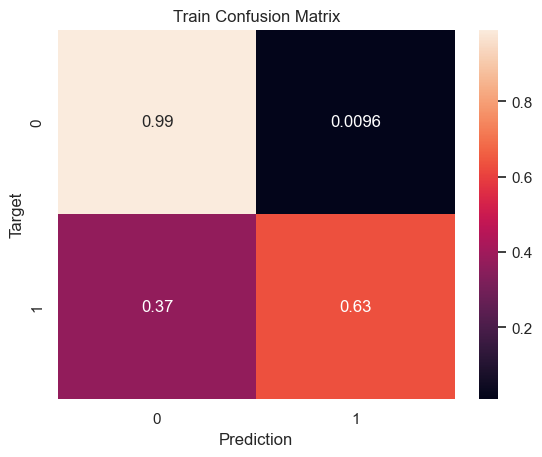

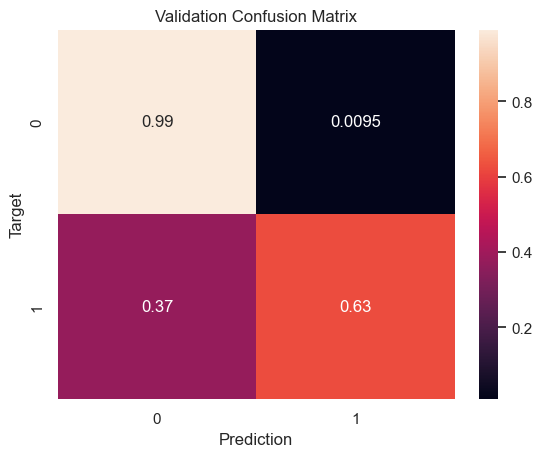

In [112]:
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy result of", name)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    print("Logistic Regression Classification Report:",name)
    print(classification_report(targets, preds))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))


# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')


# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')


##### Decision Trees

In [123]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


Accuracy result of Train
Accuracy: 99.90%
Logistic Regression Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67630
           1       1.00      0.99      0.99      6746

    accuracy                           1.00     74376
   macro avg       1.00      0.99      1.00     74376
weighted avg       1.00      1.00      1.00     74376

Accuracy result of Validation
Accuracy: 94.70%
Logistic Regression Classification Report: Validation
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     16912
           1       0.69      0.74      0.72      1683

    accuracy                           0.95     18595
   macro avg       0.83      0.85      0.84     18595
weighted avg       0.95      0.95      0.95     18595



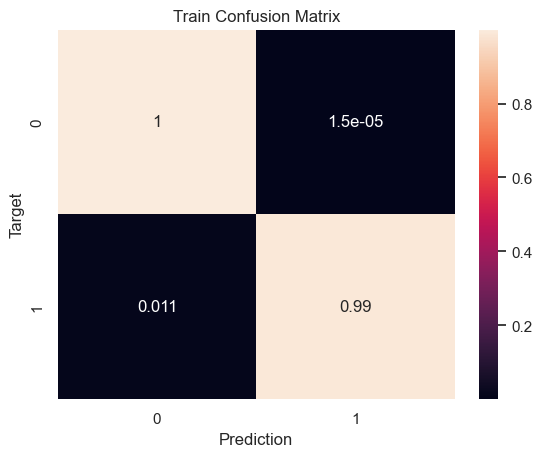

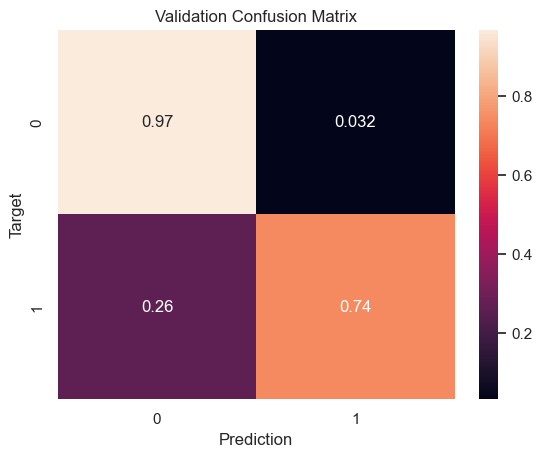

In [124]:
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy result of", name)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    print("Logistic Regression Classification Report:",name)
    print(classification_report(targets, preds))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))


# Predict and plot on the training data
train_preds = predict_and_plot(dt, X_train, y_train, 'Train')


# Predict and plot on the validation data
val_preds = predict_and_plot(dt, X_test, y_test, 'Validation')


##### Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_jobs =-1, random_state = 42)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [116]:
rf_classifier.score(X_train,y_train)

0.9990050553942131

Accuracy: 99.90%
Classification Report: Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67630
           1       1.00      0.99      0.99      6746

    accuracy                           1.00     74376
   macro avg       1.00      1.00      1.00     74376
weighted avg       1.00      1.00      1.00     74376

Accuracy: 96.78%
Classification Report: Validation
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16912
           1       0.93      0.69      0.80      1683

    accuracy                           0.97     18595
   macro avg       0.95      0.84      0.89     18595
weighted avg       0.97      0.97      0.97     18595



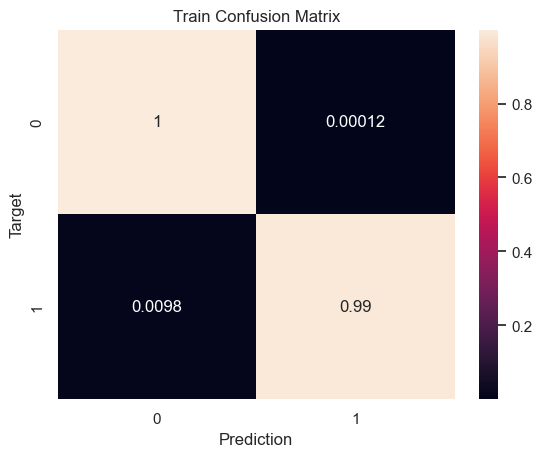

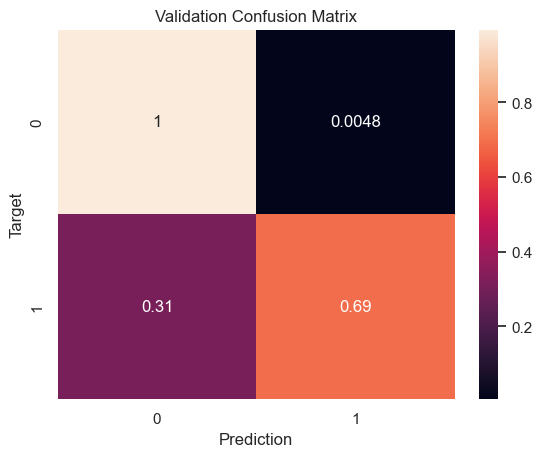

In [117]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
        
    print("Classification Report:",name)
    print(classification_report(targets, preds))
    
    
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return preds

train_preds = predict_and_plot(rf_classifier, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(rf_classifier, X_test, y_test, 'Validation')

##### SVM

In [118]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

Accuracy: 95.24%
Classification Report: Train
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     67630
           1       1.00      0.48      0.64      6746

    accuracy                           0.95     74376
   macro avg       0.97      0.74      0.81     74376
weighted avg       0.95      0.95      0.94     74376

Accuracy: 95.32%
Classification Report: Validation
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     16912
           1       1.00      0.48      0.65      1683

    accuracy                           0.95     18595
   macro avg       0.98      0.74      0.81     18595
weighted avg       0.96      0.95      0.95     18595



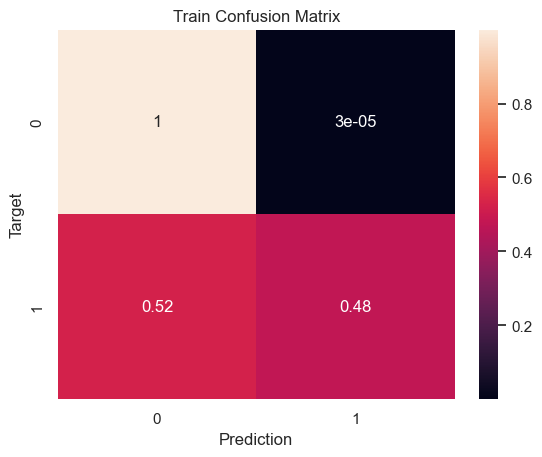

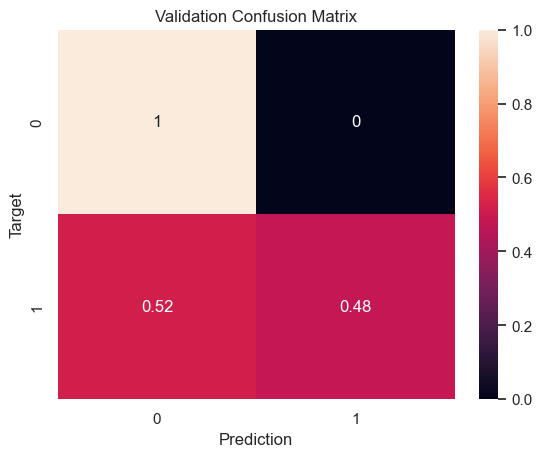

In [119]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
        
    print("Classification Report:",name)
    print(classification_report(targets, preds))
    
    
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return preds

train_preds = predict_and_plot(svm, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(svm, X_test, y_test, 'Validation')

##### XGBoost Classifier

In [120]:
# Create and train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42,max_features='sqrt', n_estimators=100, max_depth=10)
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("XGBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

C:\Users\wpdev\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:14:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.9668728152729228
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     16912
           1       0.91      0.71      0.79      1683

    accuracy                           0.97     18595
   macro avg       0.94      0.85      0.89     18595
weighted avg       0.97      0.97      0.97     18595



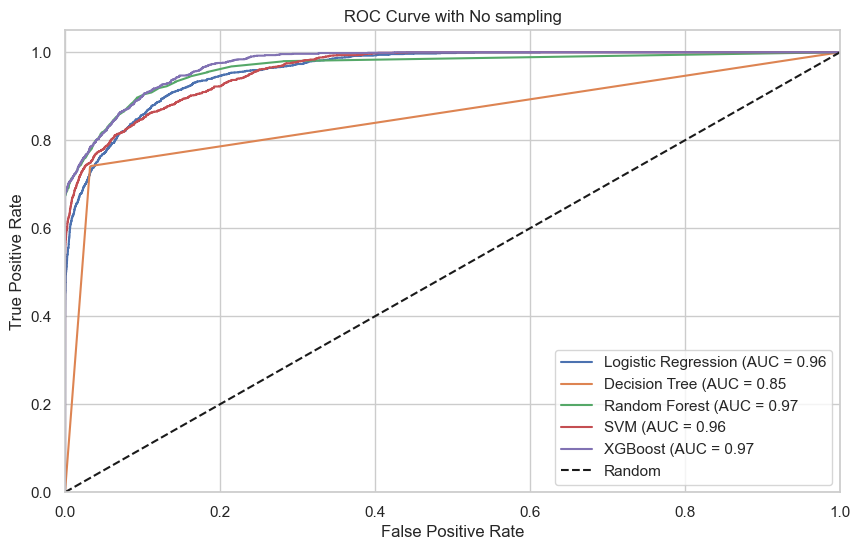

In [127]:
# Define a list of classifiers and their names excluding Linear Regression
classifiers = [log_reg,dt,rf_classifier,svm,xgb_classifier]
classifier_names = ["Logistic Regression","Decision Tree" , "Random Forest" ,"SVM","XGBoost"]

# Create a function to plot ROC curve and calculate AUC
def plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for classifier, name in zip(classifiers, classifier_names):
        if hasattr(classifier, 'predict_proba'):  # Check if the classifier has predict_proba method
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        else:
            try:
                y_pred_prob = classifier.decision_function(X_test)
            except AttributeError:
                raise AttributeError(f"{name} does not have predict_proba or decision_function method.")

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f}")

    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve with No sampling")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves and calculate AUC for classifiers excluding Linear Regression
plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test)

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the list of classifiers
classifier_objs = [log_reg,dt,rf_classifier,svm,xgb_classifier]
classifiers = ["Logistic Regression","Decision Tree" , "Random Forest" ,"SVM","XGBoost"]

# Initialize lists to store evaluation metrics
accuracy = []
precision = []
recall = []
f1 = []

# Calculate evaluation metrics for each classifier
for clf in classifier_objs:
    # Predict the labels on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

# Create a DataFrame to store the evaluation metrics
results_df = pd.DataFrame({'Classifier': classifiers,
                           'Accuracy': accuracy,
                           'Precision': precision,
                           'Recall': recall,
                           'F1-score': f1})

# Display the DataFrame
print(results_df)


            Classifier  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.957515   0.867490  0.626263  0.727398
1        Decision Tree  0.947029   0.694754  0.739750  0.716547
2        Random Forest  0.967841   0.934347  0.693405  0.796044
3                  SVM  0.953213   1.000000  0.483066  0.651442
4              XGBoost  0.966873   0.905087  0.708259  0.794667


##### Compare models with under sampling and model with no sampling

As sampling method under sapling technique was selected due to high records count in lower class as well.

ROC Curves and AUC Scores:

Without Sampling:

* Logistic Regression: AUC = 0.96
* Decision Tree: AUC = 0.85
* Random Forest: AUC = 0.97
* SVM: AUC = 0.96
* XGBoost: AUC = 0.97

Under Sampling:

* Logistic Regression: AUC = 0.96
* Decision Tree (Tuned): AUC = 0.97
* Random Forest (Tuned): AUC = 0.98
* SVM: AUC = 0.96
* XGBoost (Tuned): AUC = 0.98


The tuned models under undersampling conditions seem to perform slightly better in terms of AUC, particularly the Random Forest and XGBoost models, which reach AUC = 0.98.


Performance Metrics:

Without Sampling:

* Highest Accuracy: Random Forest (0.967841)
* Highest Precision: SVM (1.000000)
* Highest Recall: Decision Tree (0.739750)
* Highest F1-score: Random Forest (0.796044)

Under Sampling:

* Highest Accuracy: Random Forest Tuned Parameters (0.907177)
* Highest Precision: Decision Tree Tuned Parameters (0.907589)
* Highest Recall: Random Forest Tuned Parameters (0.927859)
* Highest F1-score: Random Forest Tuned Parameters (0.909980)

Models trained without sampling have higher accuracy. However, this may be because these models are likely biased towards the majority class. Under sampling leads to a more balanced dataset and thus can decrease overall accuracy but improve minority class recognition.

The SVM with no sampling has a perfect precision score, but it's accompanied by a low recall, indicating a trade-off. In the undersampled data, the Decision Tree with tuned parameters has the highest precision.

The SVM with no sampling has a perfect precision score, but it's accompanied by a low recall, indicating a trade-off. In the undersampled data, the Decision Tree with tuned parameters has the highest precision.

The F1-scores for models trained on undersampled data are generally higher, showing a better balance between precision and recall, particularly for recognizing the minority class.

The models trained without sampling display high accuracy, but their lower recall scores suggest they may not be as effective at identifying the minority class. This is a typical issue in imbalanced datasets, where high accuracy might not indicate good predictive performance across all classes.

The models trained on undersampled data demonstrate a more balanced performance between precision and recall, especially the tuned Random Forest and XGBoost models, which may be more suitable for scenarios where identifying the minority class is crucial.

#### Actionalble insights



This data set is random checks for patients who have visited the Emergency Room (ER) or Hospital or Clinic.

Females are more represented than males and others in this dataset.Special attention should be given to female patients in diabetes prediction and prevention strategies due to their higher representation.

Age and BMI are key factors; older age and higher BMI are observed more frequently in diabetic patients.HbA1c and blood glucose levels are higher in diabetic patients, as expected.Programs aimed at diabetes prevention could target weight management and blood glucose control. Regular screening for blood glucose levels and HbA1c could be implemented for early detection, particularly in older adults and those with higher BMI.

There is a moderate correlation between age and BMI. HbA1c levels and blood glucose levels also show a correlation, though not strong.Lifestyle interventions that address both weight and physical activity might be particularly effective in mitigating the risk of diabetes.